# Problem Statement

# Business Case

This is case study understanding a particular bank loan defaulters. This bank give loan to applicants to those who can repay back or will ensure that they are capable of repaying back the loan. So this case study will identify the patterns for those applicants who may have difficulty in paying installments or be a defaulter by using current applications and previous applications status which may use in denying the loan, or reducing the loan amount, or lending at higher interest rate. So when any data is available or anyone applying for loan, the bank can check whether or not applied before, or payment difficulty or how long it take to repay the loan. Our goal is to take data and give information from the dataset.

# Project Summary

This project which is given here is an analysis of home loan defaulter. The project goal is to find the customer are segments that are eligible for taking loan from each feature of all the files such as application_train, bureau, bureau_balance, POS_CASH_balance, credit_card_balance, previous_application and installment_payments. The Goal and Insights of the project as follows,

# Data Overview

In [1]:
#importing required library to display image about data
from IPython.display import Image

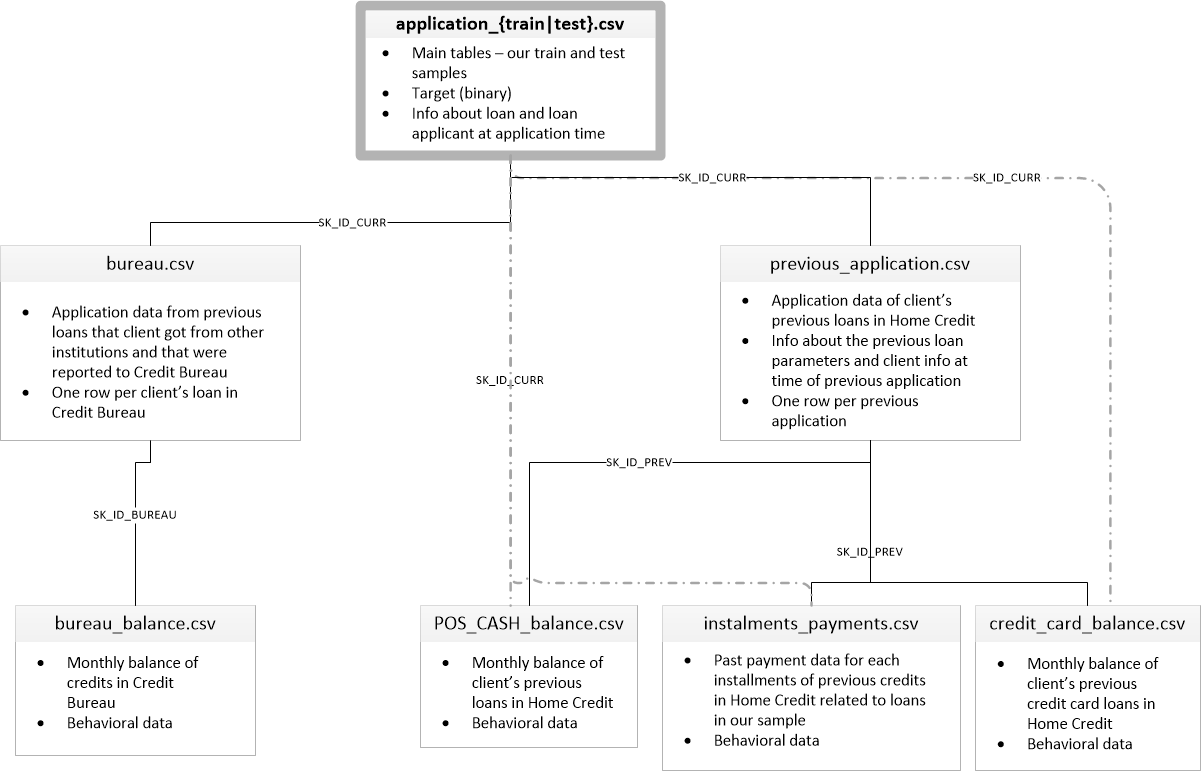

In [2]:
#loading the image file
Image(filename="/Users/sharmilanr/Sharmila/Datamites/Internship/Rubixe_Internship/Home_Loan/Home_Loan_data.png")

# Importing Libraries

In [3]:
#importing basic required libraries to read data and analysis data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
# for warnings 
import warnings
warnings.filterwarnings('ignore')

# 1. Loading application_train data

In [4]:
#loading the application_train data
app = pd.read_csv("application_train.csv")
app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

# EDA for application_train data

In [5]:
#dimensions of application_train data
app.shape

(307511, 122)

In [6]:
#dtypes of data
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [8]:
app.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [9]:
app_num=[feature for feature in app.columns if app[feature].dtype!="O"]
len(app_num)

106

In [10]:
app_cat=[feature for feature in app.columns if app[feature].dtype=="O"]
len(app_cat)

16

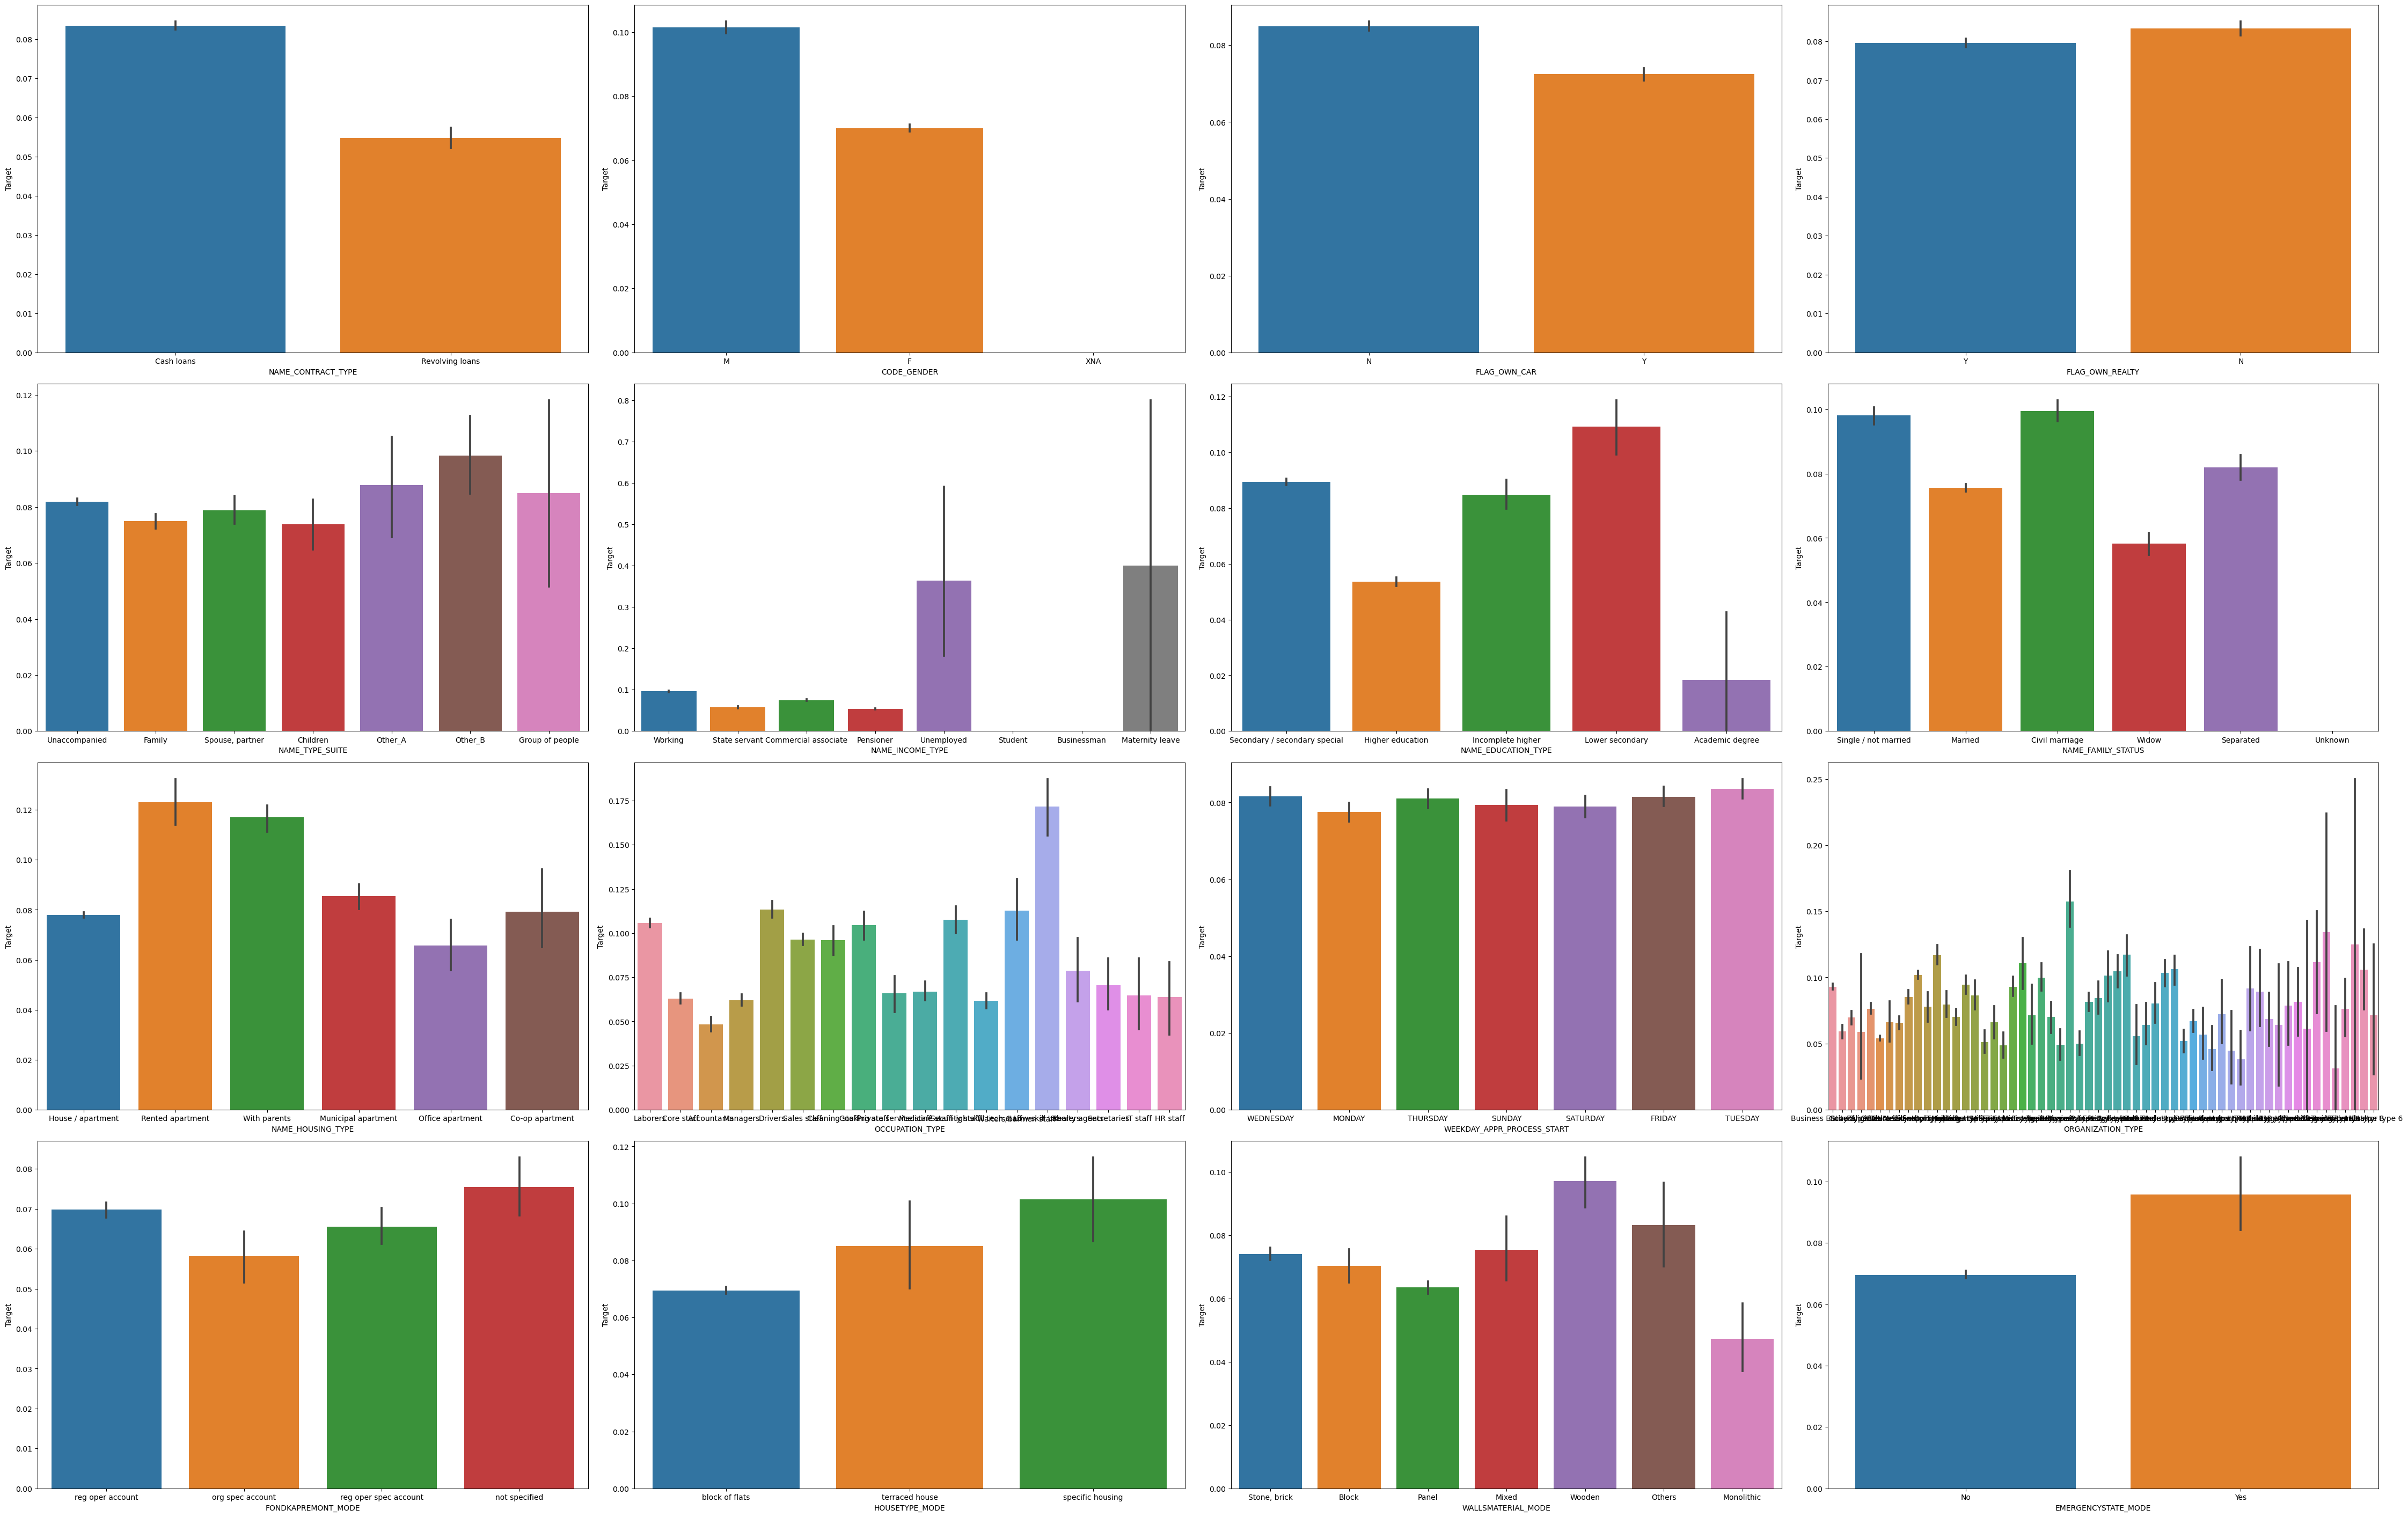

In [12]:
#For categorical features
plt.figure(figsize=(45,35))
plotno=1
for feature in app_cat:
    if plotno<=20:
        ax=plt.subplot(5,4,plotno)
        sb.barplot(x=app[feature],y=app.TARGET)
        plt.xlabel(feature)
        plt.ylabel("Target")
    plotno+=1
plt.tight_layout()

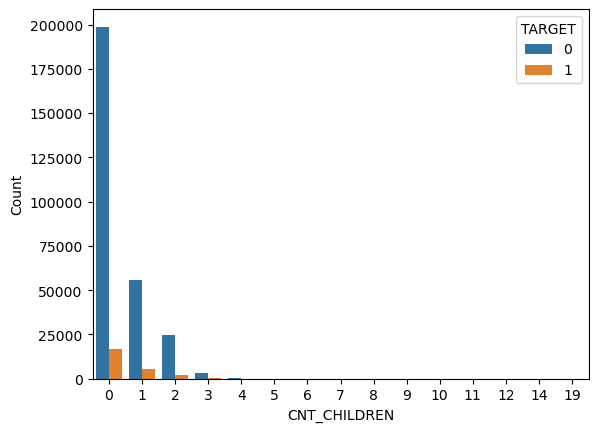

In [13]:
#Visualization for numerical features
sb.countplot(x='CNT_CHILDREN', hue='TARGET', data=app)
plt.xlabel('CNT_CHILDREN')
plt.ylabel('Count')
plt.show()

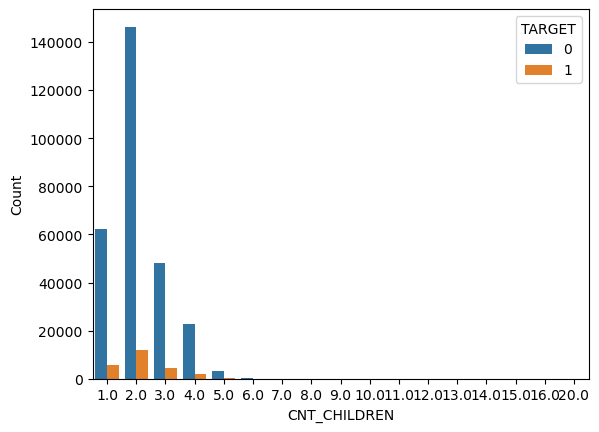

In [14]:
#Visualization for numerical features
sb.countplot(x='CNT_FAM_MEMBERS', hue='TARGET', data=app)
plt.xlabel('CNT_CHILDREN')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='CNT_FAM_MEMBERS', ylabel='CNT_CHILDREN'>

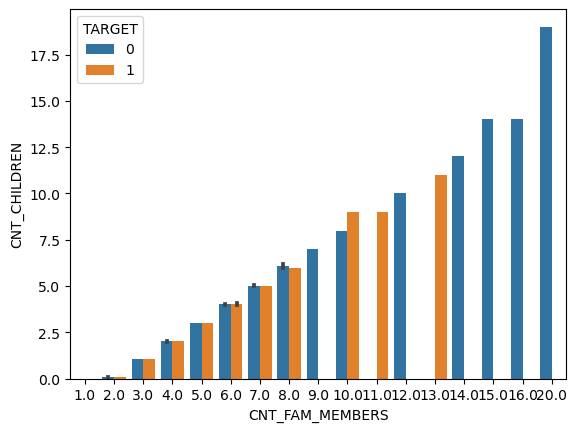

In [15]:
sb.barplot(x=app.CNT_FAM_MEMBERS,y=app.CNT_CHILDREN,hue=app.TARGET)

Count children feature can drop from file.

In [16]:
start_doc1=app.columns.get_loc("FLAG_DOCUMENT_2")
end_doc1=app.columns.get_loc("FLAG_DOCUMENT_21")

doc1=app.iloc[:,start_doc1:end_doc1+1]

In [17]:
app.FLAG_DOCUMENT_2.value_counts()

0    307498
1        13
Name: FLAG_DOCUMENT_2, dtype: int64

<Axes: ylabel='Count'>

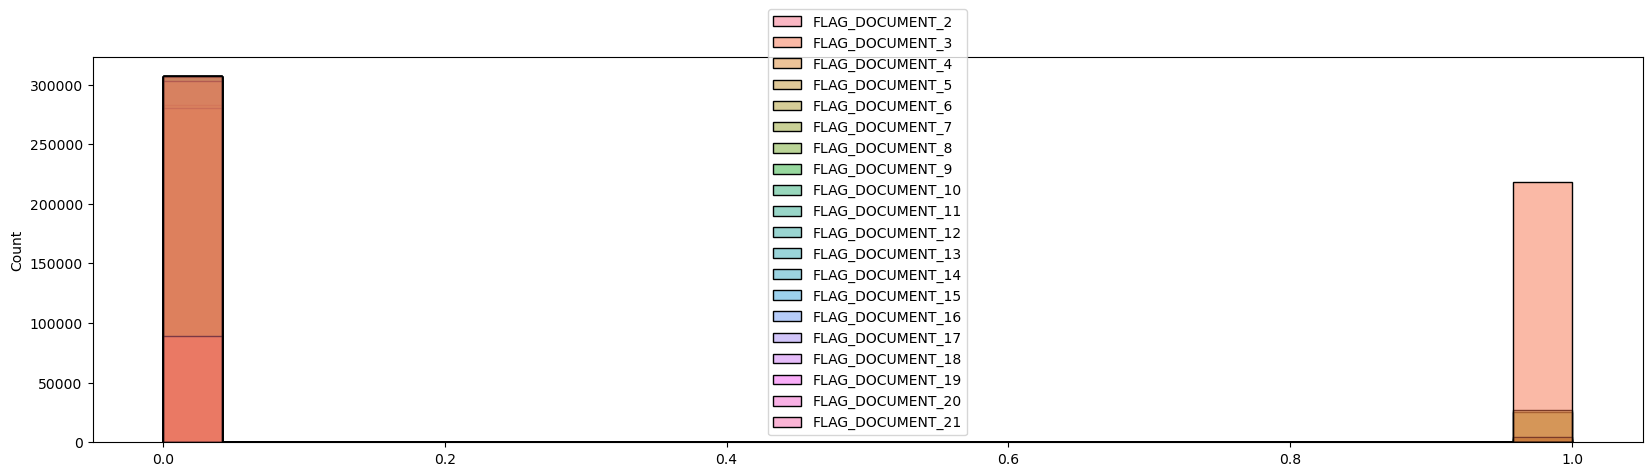

In [19]:
plt.figure(figsize=(20,5))
sb.histplot(doc1)

<Axes: >

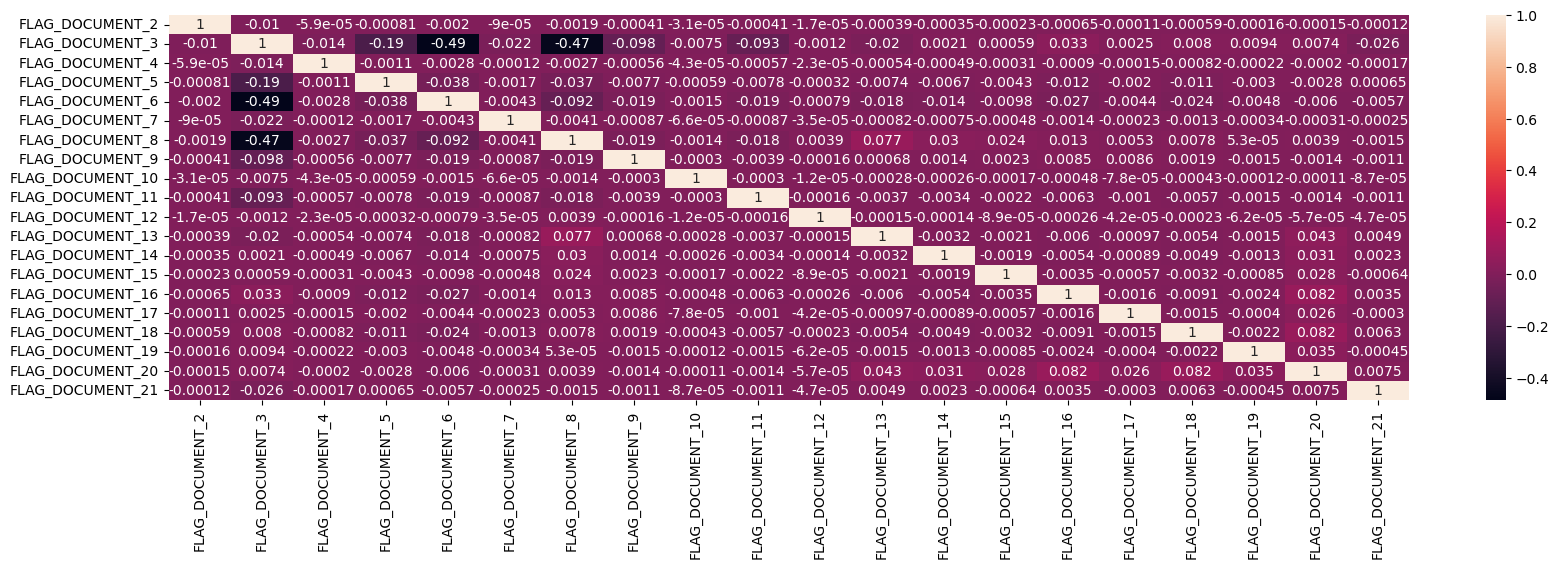

In [22]:
plt.figure(figsize=(20,5))
sb.heatmap(doc1.corr(),annot=True)

<Axes: >

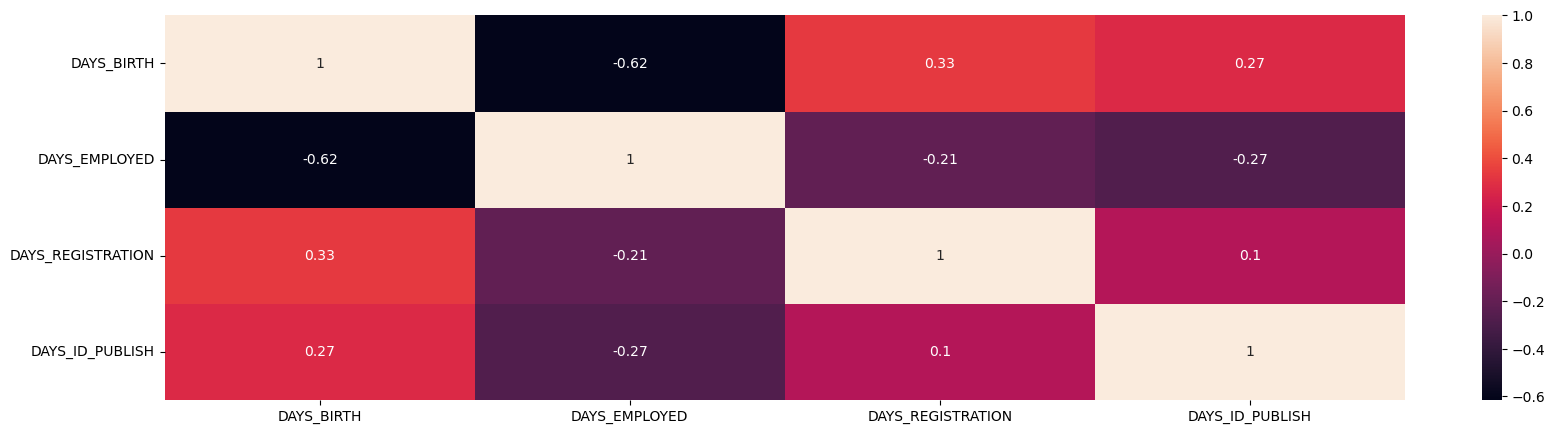

In [23]:
start_days=app.columns.get_loc("DAYS_BIRTH")
end_days=app.columns.get_loc("DAYS_ID_PUBLISH")

birth=(app.iloc[:,start_days:end_days+1])
plt.figure(figsize=(20,5))
sb.heatmap(birth.corr(),annot=True)

In [24]:
start_re=app.columns.get_loc("REG_REGION_NOT_LIVE_REGION")
end_re=app.columns.get_loc("LIVE_CITY_NOT_WORK_CITY")
df_reg=app.iloc[:,start_re:end_re+1]
df_reg["REGION_POPULATION_RELATIVE"]=app["REGION_POPULATION_RELATIVE"]
df_reg["REGION_RATING_CLIENT"]=app["REGION_RATING_CLIENT"]
df_reg["REGION_RATING_CLIENT_W_CITY"]=app["REGION_RATING_CLIENT_W_CITY"]

<Axes: >

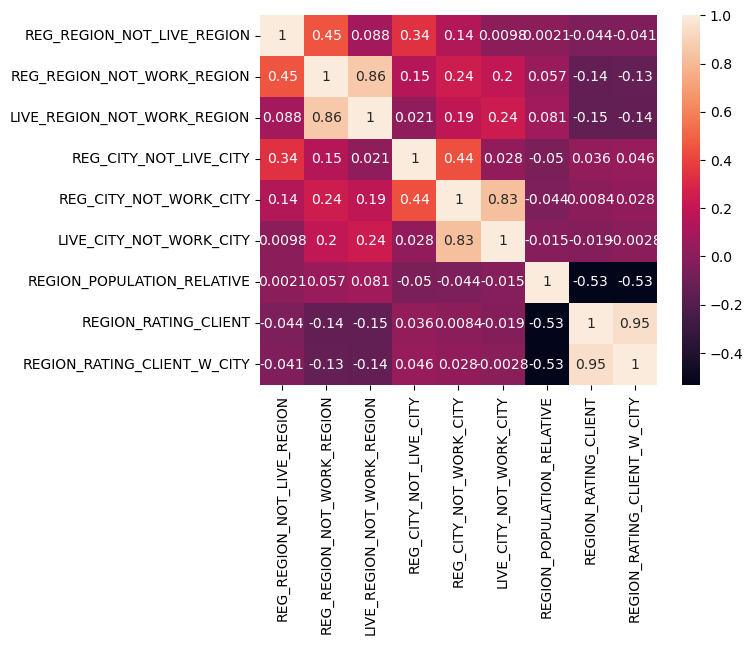

In [25]:
sb.heatmap(df_reg.corr(),annot=True)

In [26]:
start=app.columns.get_loc("FLAG_MOBIL")
end=app.columns.get_loc("FLAG_EMAIL")
df_con=app.iloc[:,start:end+1]

<Axes: >

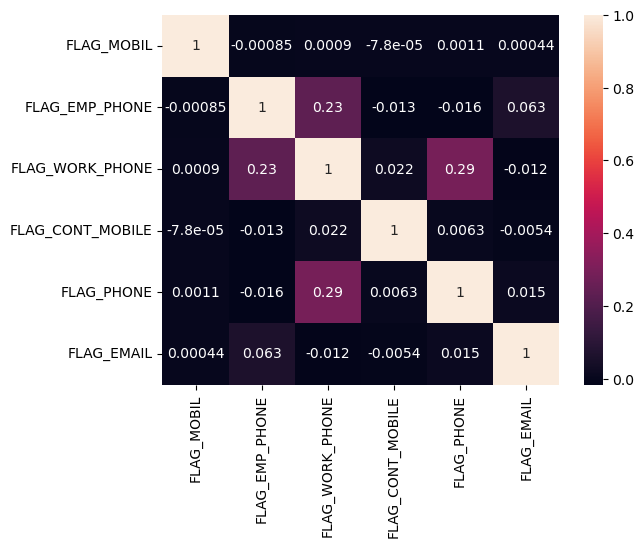

In [27]:
sb.heatmap(df_con.corr(),annot=True)

<Axes: xlabel='FLAG_MOBIL', ylabel='FLAG_CONT_MOBILE'>

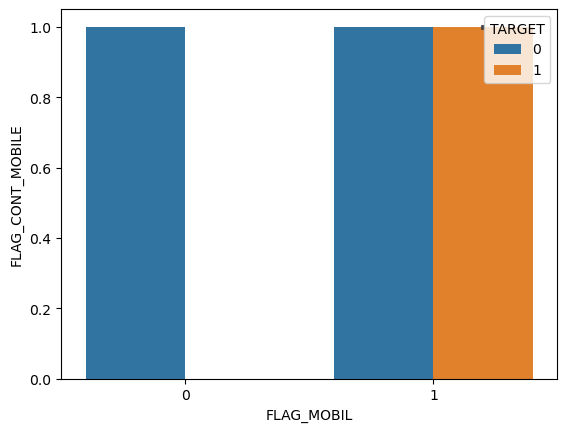

In [28]:
sb.barplot(x=app.FLAG_MOBIL,y=app.FLAG_CONT_MOBILE,hue=app.TARGET)

<Axes: xlabel='FLAG_MOBIL', ylabel='FLAG_EMP_PHONE'>

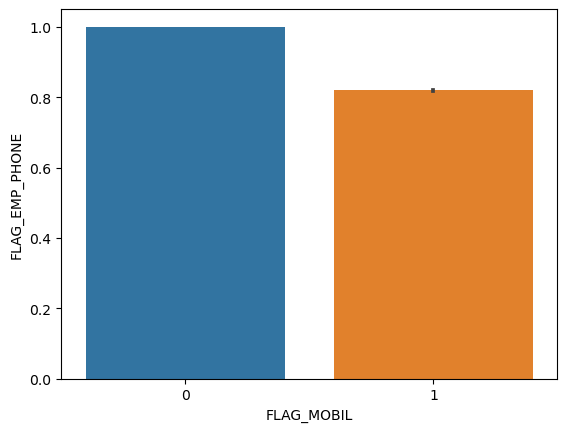

In [29]:
sb.barplot(x=app.FLAG_MOBIL,y=app.FLAG_EMP_PHONE)

<Axes: xlabel='FLAG_MOBIL', ylabel='FLAG_WORK_PHONE'>

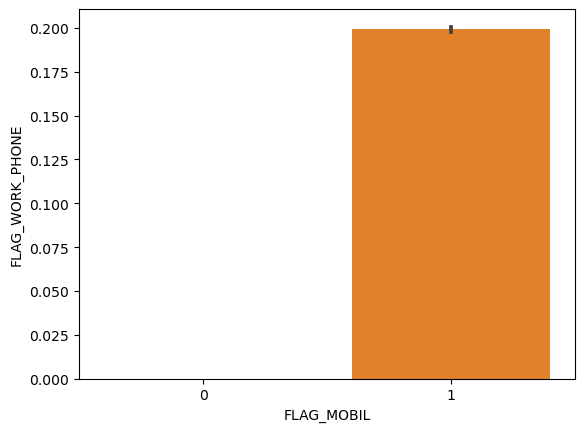

In [30]:
sb.barplot(x=app.FLAG_MOBIL,y=app.FLAG_WORK_PHONE)

<Axes: xlabel='FLAG_MOBIL', ylabel='FLAG_EMAIL'>

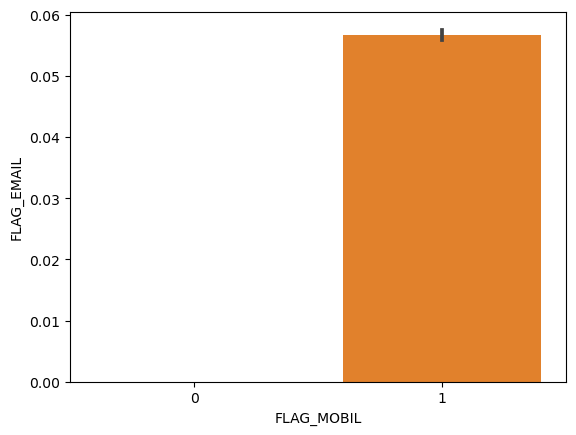

In [31]:
sb.barplot(x=app.FLAG_MOBIL,y=app.FLAG_EMAIL)

<Axes: >

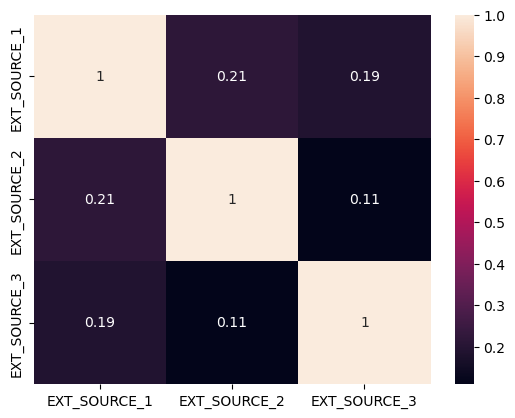

In [32]:
starte=app.columns.get_loc("EXT_SOURCE_1")
ende=app.columns.get_loc("EXT_SOURCE_3")
ext=app.iloc[:,starte:ende+1]
sb.heatmap(ext.corr(),annot=True)

<Axes: >

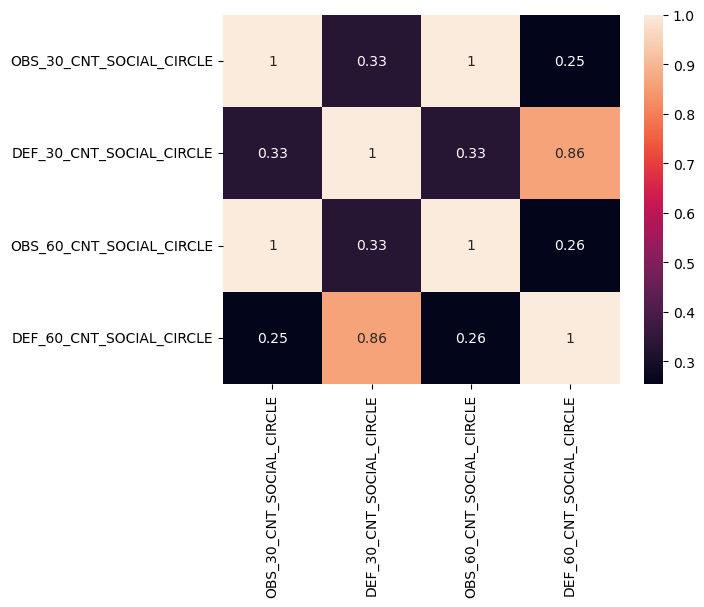

In [33]:
starts=app.columns.get_loc("OBS_30_CNT_SOCIAL_CIRCLE")
ends=app.columns.get_loc("DEF_60_CNT_SOCIAL_CIRCLE")
social=app.iloc[:,starts:ends+1]
sb.heatmap(social.corr(),annot=True)

<Axes: >

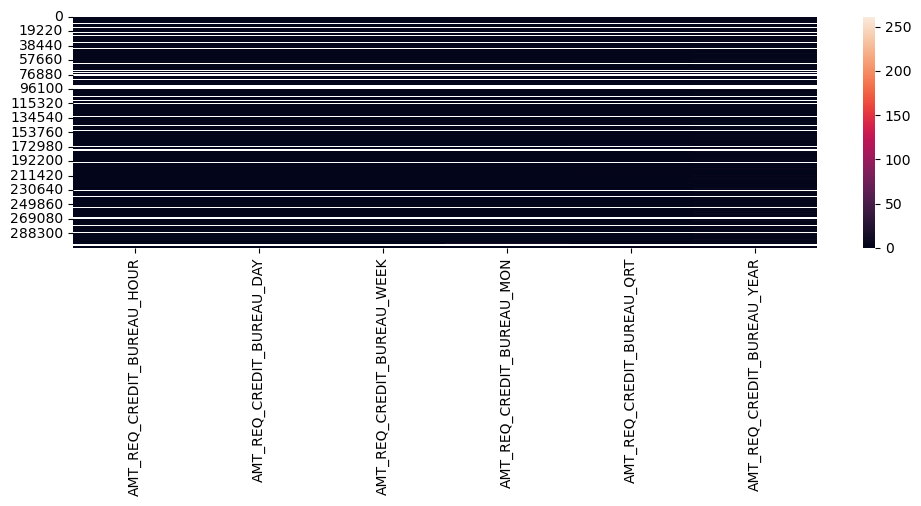

In [34]:
startbu=app.columns.get_loc("AMT_REQ_CREDIT_BUREAU_HOUR")
endbu=app.columns.get_loc("AMT_REQ_CREDIT_BUREAU_YEAR")
bu=app.iloc[:,startbu:endbu+1]
plt.figure(figsize=(12,3))
sb.heatmap(bu)

<Axes: >

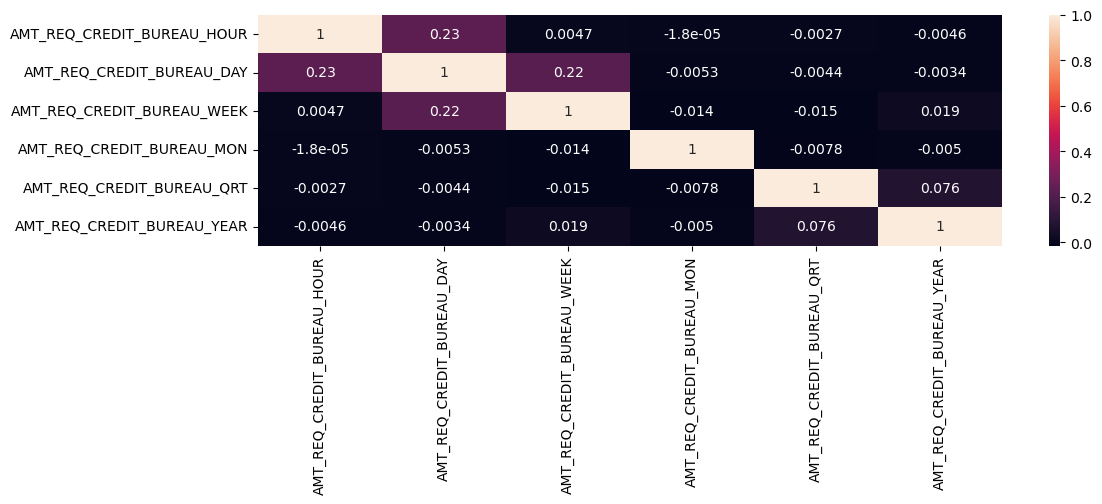

In [35]:
plt.figure(figsize=(12,3))
sb.heatmap(bu.corr(),annot=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0'),
  Text(21, 0, '21.0'),
  Text(22, 0, '22.0'),
  Text(23, 0, '23.0'),
  Text(24, 0, '24.0'),
  Text(25, 0, '25.0'),
  Text(26, 0, '26.0'),
  Text(27, 0, '27.0'),
  Text(28, 0, '28.0'),
  Text(29, 0, '29.0'),
  Text(30, 0, '30.0'),
  Text(31, 0, '31.0'),
  

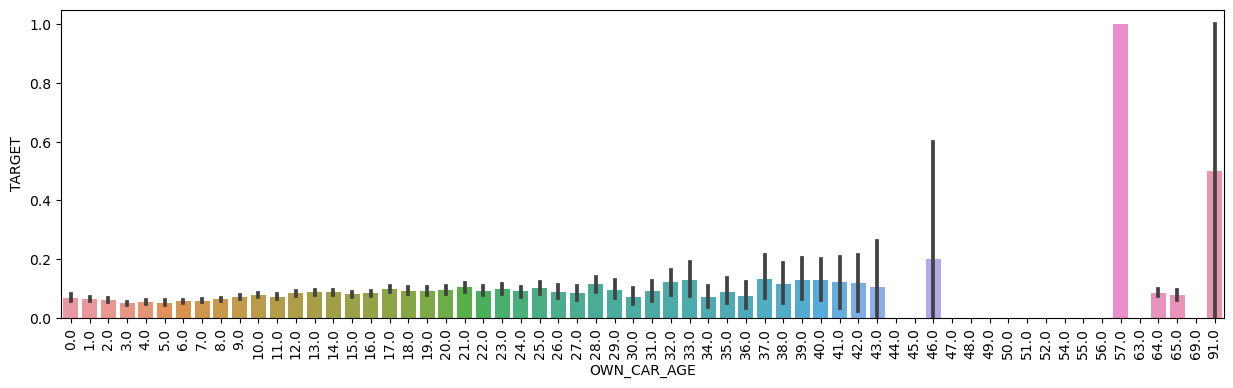

In [36]:
plt.figure(figsize=(15,4))
sb.barplot(x="OWN_CAR_AGE",y="TARGET",data=app)
plt.xticks(rotation=90)

<Axes: >

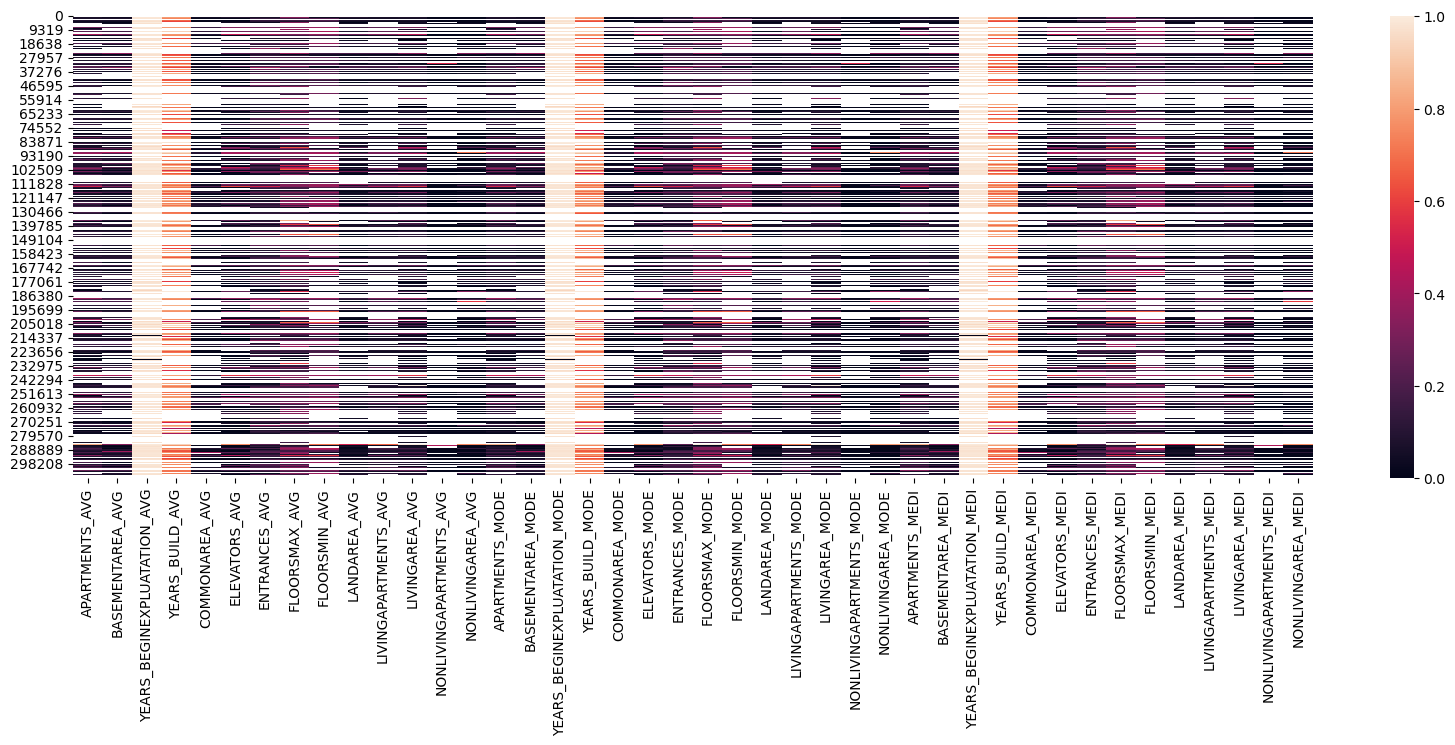

In [38]:
start_h=app.columns.get_loc("APARTMENTS_AVG")
end_h=app.columns.get_loc("TOTALAREA_MODE")

df_house=app.iloc[:,start_h:end_h+1]
df_house["TARGET"]=app["TARGET"]
df_house["NAME_HOUSING_TYPE"]=app["NAME_HOUSING_TYPE"]
start_hou=df_house.columns.get_loc("APARTMENTS_AVG")
end_hou=df_house.columns.get_loc("NONLIVINGAREA_MEDI")

house_df=df_house.iloc[:,start_hou:end_hou+1]
plt.figure(figsize=(20,6))
sb.heatmap(house_df)

<Axes: >

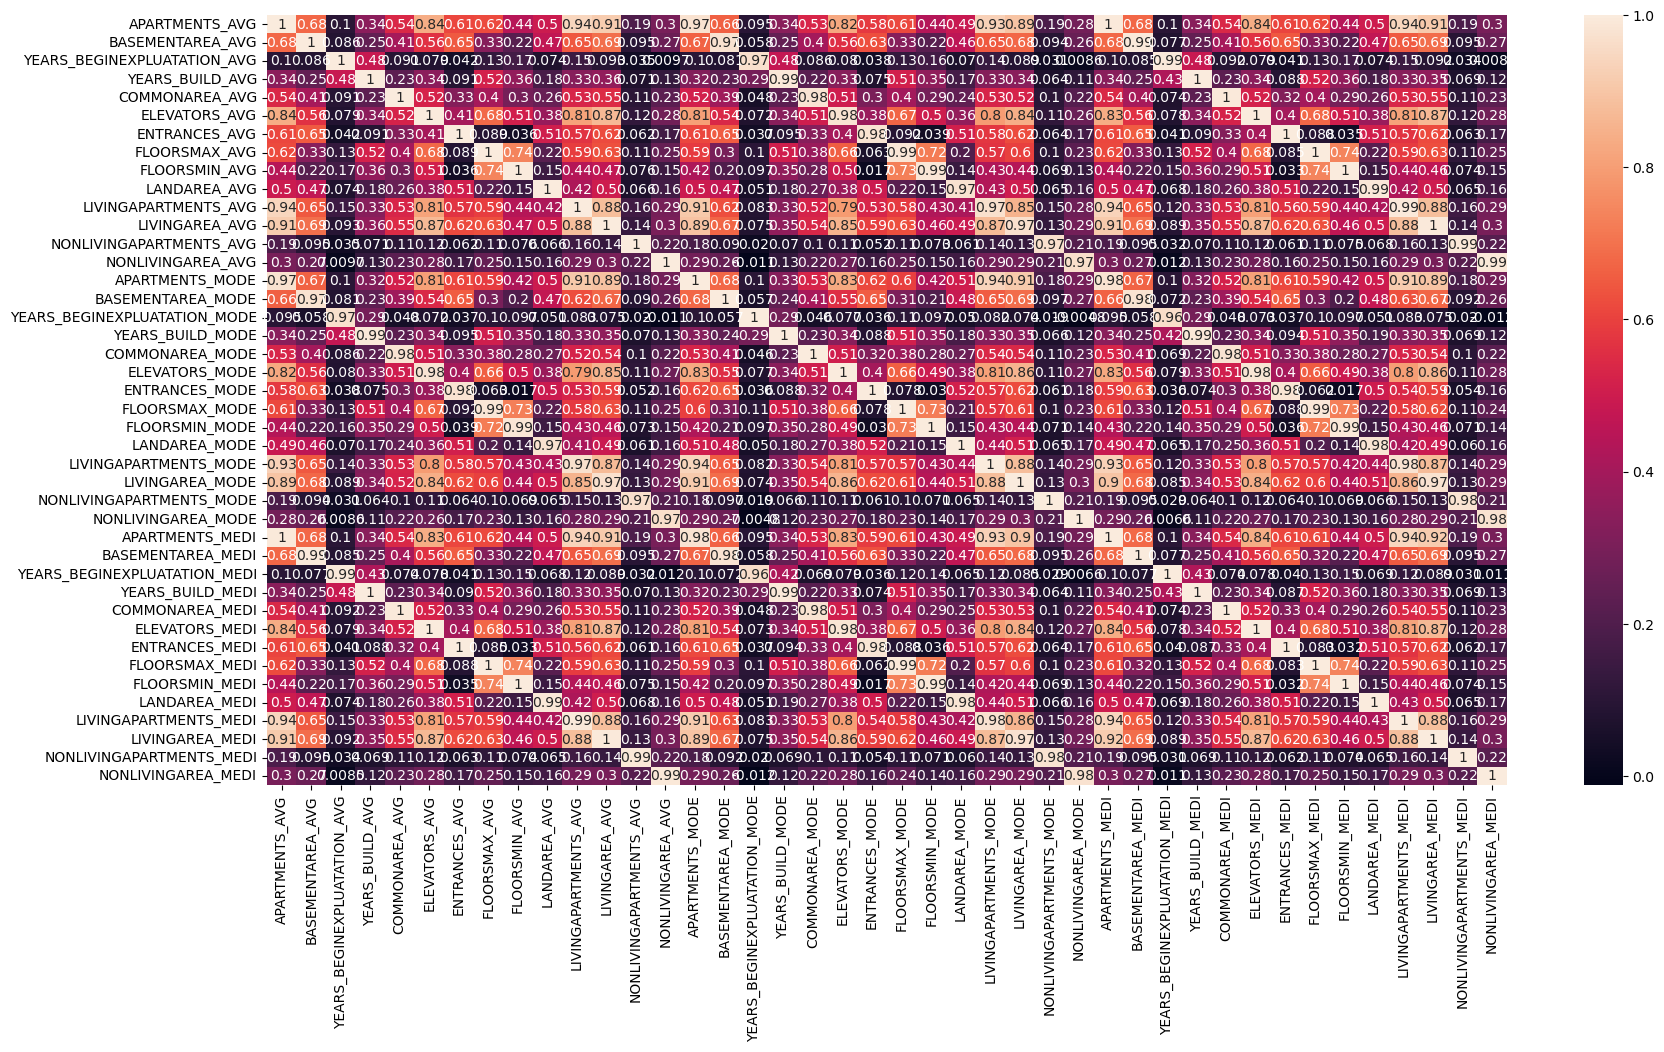

In [40]:
plt.figure(figsize=(20,10))
sb.heatmap(house_df.corr(),annot=True)

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='TARGET'>

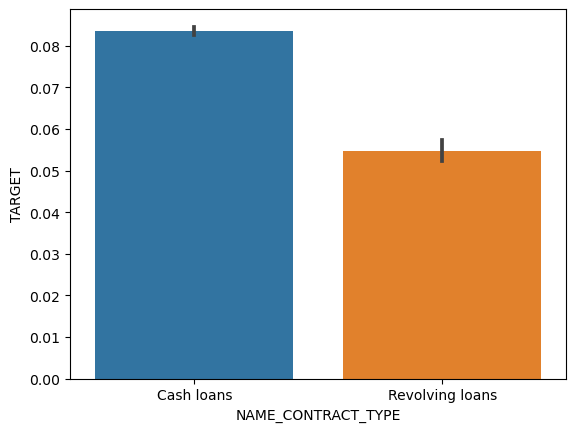

In [41]:
sb.barplot(x="NAME_CONTRACT_TYPE",y="TARGET",data=app)

In [42]:
app.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

<Axes: xlabel='CODE_GENDER', ylabel='TARGET'>

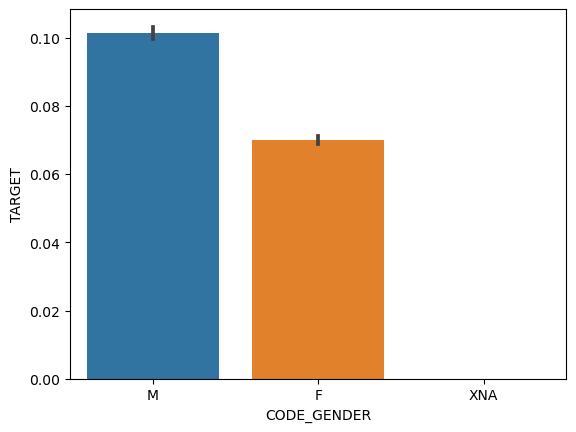

In [43]:
sb.barplot(x="CODE_GENDER",y="TARGET",data=app)

In [44]:
app.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

<Axes: xlabel='NAME_TYPE_SUITE', ylabel='TARGET'>

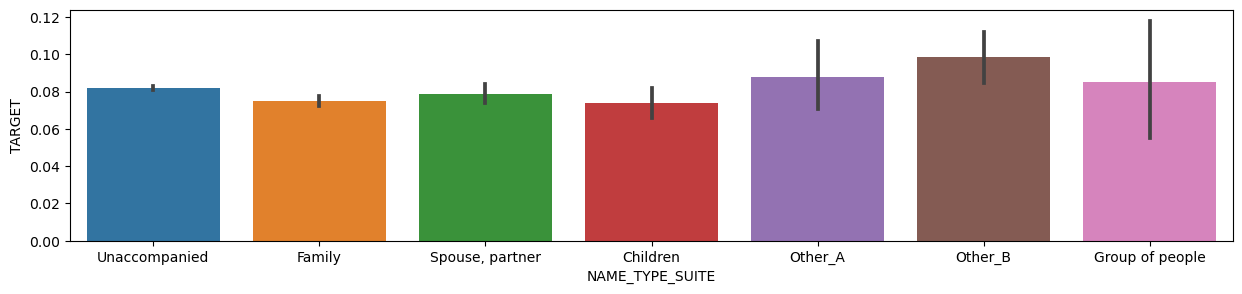

In [45]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,3)
sb.barplot(x="NAME_TYPE_SUITE",y="TARGET",data=app)

In [46]:
app.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

<Axes: xlabel='NAME_INCOME_TYPE', ylabel='TARGET'>

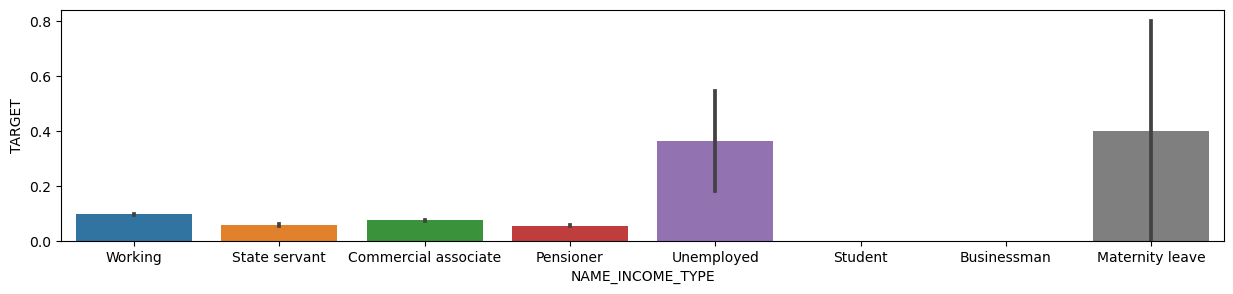

In [47]:
matplotlib.rcParams["figure.figsize"]=(15,3)
sb.barplot(x="NAME_INCOME_TYPE",y="TARGET",data=app)

In [48]:
app.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='TARGET'>

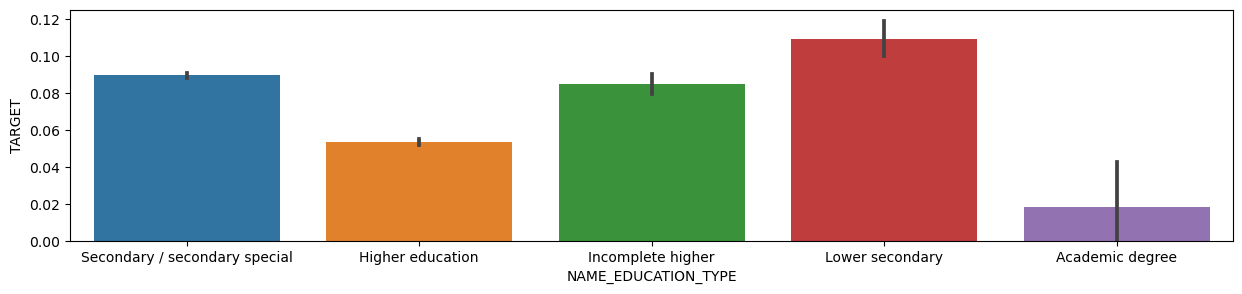

In [49]:
matplotlib.rcParams["figure.figsize"]=(15,3)
sb.barplot(x="NAME_EDUCATION_TYPE",y="TARGET",data=app)

In [50]:
app.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='TARGET'>

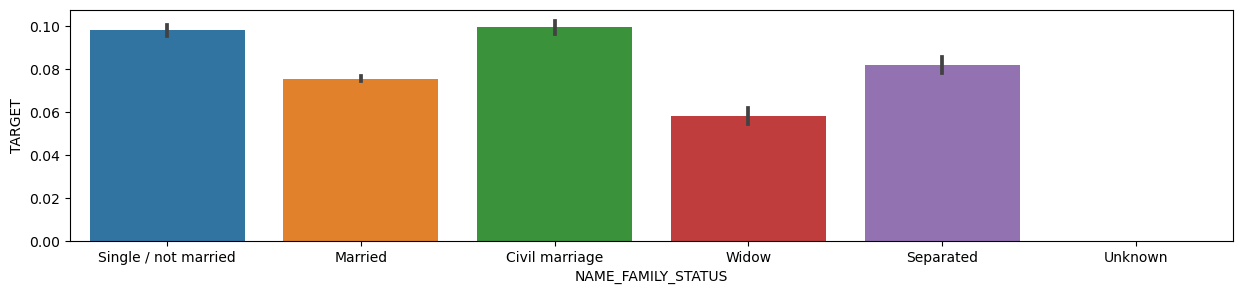

In [51]:
matplotlib.rcParams["figure.figsize"]=(15,3)
sb.barplot(x="NAME_FAMILY_STATUS",y="TARGET",data=app)

In [52]:
app.NAME_HOUSING_TYPE.value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

<Axes: xlabel='NAME_HOUSING_TYPE', ylabel='TARGET'>

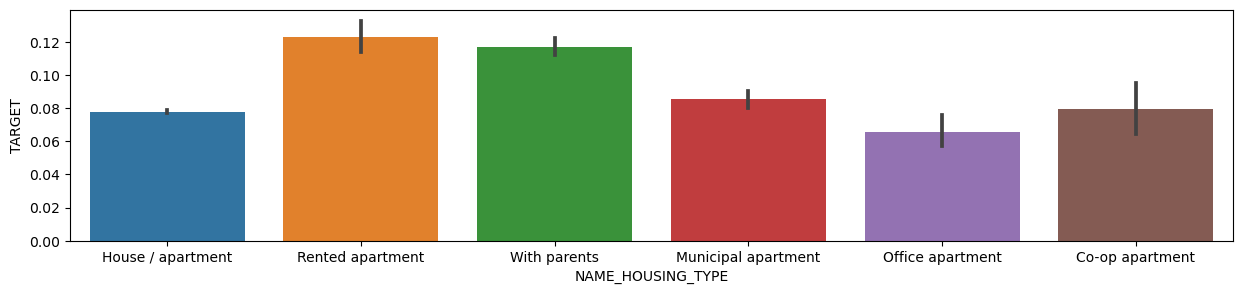

In [53]:
matplotlib.rcParams["figure.figsize"]=(15,3)
sb.barplot(x="NAME_HOUSING_TYPE",y="TARGET",data=app)

In [54]:
app.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

<Axes: xlabel='OCCUPATION_TYPE', ylabel='TARGET'>

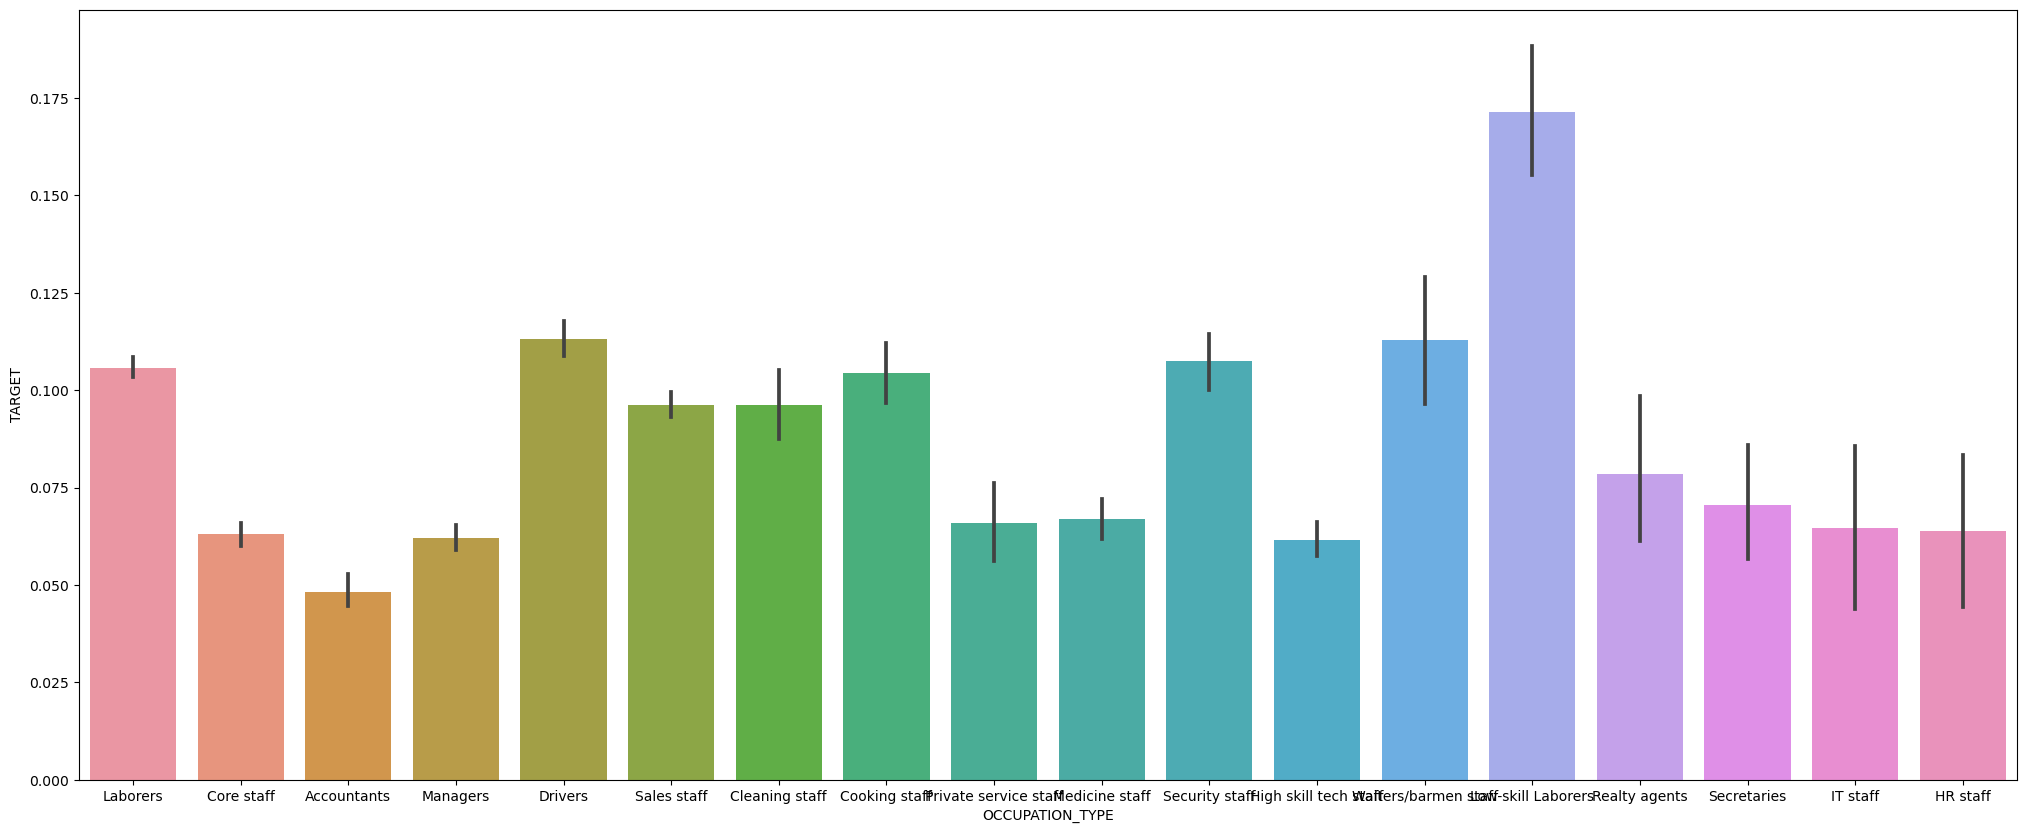

In [57]:
matplotlib.rcParams["figure.figsize"]=(25,10)
sb.barplot(x="OCCUPATION_TYPE",y="TARGET",data=app)

In [58]:
app.HOUSETYPE_MODE.value_counts()

block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64

<Axes: xlabel='HOUSETYPE_MODE', ylabel='TARGET'>

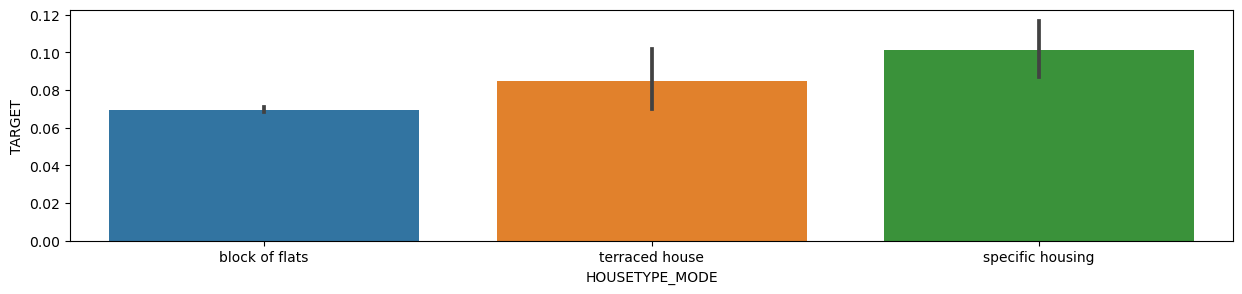

In [59]:
matplotlib.rcParams["figure.figsize"]=(15,3)
sb.barplot(x="HOUSETYPE_MODE",y="TARGET",data=app)

# 2. Loading bureau_balance data

In [60]:
#loading bureau_balance data
bur_bal = pd.read_csv("bureau_balance.csv")
bur_bal.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [61]:
#dimensions of bureau_balance data
bur_bal.shape

(27299925, 3)

In [62]:
#checking the value of SK_ID_BUREAU
bur_bal.SK_ID_BUREAU.unique()

array([5715448, 5715449, 5715451, ..., 5041172, 5041332, 5041336])

In [63]:
#count of SK_ID_BUREAU
bur_bal.SK_ID_BUREAU.value_counts()

5645521    97
6733619    97
6176606    97
6321834    97
6356432    97
           ..
6212548     1
5819605     1
5626301     1
5626300     1
6803532     1
Name: SK_ID_BUREAU, Length: 817395, dtype: int64

The drop_duplicates function will keep the first occurrence of each unique value in the "SK_ID_BUREAU" column and remove the duplicates.

In [64]:
# Remove duplicates based on the "SK_ID_BUREAU" column
fil_bur_bal = bur_bal.drop_duplicates(subset="SK_ID_BUREAU")
print(fil_bur_bal.head())

    SK_ID_BUREAU  MONTHS_BALANCE STATUS
0        5715448               0      C
27       5715449               0      C
39       5715451              -5      C
65       5715452               0      C
98       5715453               0      C


In [65]:
#dimensions of data after removing duplicates
fil_bur_bal.shape

(817395, 3)

In [66]:
#recheck the value_counts of SK_ID_BUREAU feature
fil_bur_bal.SK_ID_BUREAU.value_counts()

5715448    1
5653588    1
5658587    1
5658588    1
5658589    1
          ..
6824500    1
6824501    1
6824502    1
6824636    1
5041336    1
Name: SK_ID_BUREAU, Length: 817395, dtype: int64

# 3. Loading bureau data

In [67]:
#loading bureau data
bur = pd.read_csv("bureau.csv")
bur.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [68]:
#dimensions of bureau data
bur.shape

(1716428, 17)

In [69]:
#Check the count of SK_ID_CURR feature
bur.SK_ID_CURR.value_counts()

120860    116
169704     94
318065     78
251643     61
425396     60
         ... 
405288      1
413028      1
288569      1
215224      1
235871      1
Name: SK_ID_CURR, Length: 305811, dtype: int64

In [70]:
bur.SK_ID_BUREAU.value_counts()

5714462    1
6758530    1
6758496    1
6758495    1
6758494    1
          ..
6298831    1
6298830    1
6298829    1
6298828    1
5057778    1
Name: SK_ID_BUREAU, Length: 1716428, dtype: int64

The drop_duplicates function will keep the first occurrence of each unique value in the "SK_ID_BUREAU" and "SK_ID_CURR" columns and remove the duplicates.

In [71]:
#check the duplicate rows based on SK_ID_BUREAU feature
duplicate_rows = bur[bur.duplicated(subset="SK_ID_BUREAU", keep=False)]
print(duplicate_rows)

Empty DataFrame
Columns: [SK_ID_CURR, SK_ID_BUREAU, CREDIT_ACTIVE, CREDIT_CURRENCY, DAYS_CREDIT, CREDIT_DAY_OVERDUE, DAYS_CREDIT_ENDDATE, DAYS_ENDDATE_FACT, AMT_CREDIT_MAX_OVERDUE, CNT_CREDIT_PROLONG, AMT_CREDIT_SUM, AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM_LIMIT, AMT_CREDIT_SUM_OVERDUE, CREDIT_TYPE, DAYS_CREDIT_UPDATE, AMT_ANNUITY]
Index: []


In [72]:
#check the duplicate rows based on SK_ID_CURR feature
duplicate_rows = bur[bur.duplicated(subset="SK_ID_CURR", keep=False)]
print(duplicate_rows)

         SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0            215354       5714462        Closed      currency 1         -497   
1            215354       5714463        Active      currency 1         -208   
2            215354       5714464        Active      currency 1         -203   
3            215354       5714465        Active      currency 1         -203   
4            215354       5714466        Active      currency 1         -629   
...             ...           ...           ...             ...          ...   
1716423      259355       5057750        Active      currency 1          -44   
1716424      100044       5057754        Closed      currency 1        -2648   
1716425      100044       5057762        Closed      currency 1        -1809   
1716426      246829       5057770        Closed      currency 1        -1878   
1716427      246829       5057778        Closed      currency 1         -463   

         CREDIT_DAY_OVERDUE  DAYS_CREDI

In [73]:
#count of duplicate rows data based on SK_ID_CURR
duplicate_rows.SK_ID_CURR.value_counts()

120860    116
169704     94
318065     78
251643     61
425396     60
         ... 
436570      2
419378      2
321068      2
222763      2
198518      2
Name: SK_ID_CURR, Length: 264291, dtype: int64

In [74]:
# Remove duplicates based on the "SK_ID_CURR" column
fil_bur = bur.drop_duplicates(subset="SK_ID_CURR")

In [75]:
#dimensions of the data after removing duplicates
fil_bur.shape

(305811, 17)

# 4. Loading credit_card_balance data

In [76]:
#loading credit_card_balance data
cc_bal = pd.read_csv("credit_card_balance.csv")
cc_bal.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

In [77]:
#dimensions of credit_card_balance data
cc_bal.shape

(3840312, 23)

In [78]:
#count of SK_ID_PREV feature
cc_bal.SK_ID_PREV.value_counts()

2377894    96
2581635    96
1130707    96
1602951    96
2775491    96
           ..
1896484     1
2553866     1
2809310     1
2152605     1
2191610     1
Name: SK_ID_PREV, Length: 104307, dtype: int64

The drop_duplicates function will keep the first occurrence of each unique value in the "SK_ID_PREV" and "SK_ID_CURR" columns and remove the duplicates.

In [79]:
#check the duplicate rows based on SK_ID_PREV feature
dup_rows1 = cc_bal[cc_bal.duplicated(subset="SK_ID_PREV", keep=False)]
print(dup_rows1)

         SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0           2562384      378907              -6       56.970   
1           2582071      363914              -1    63975.555   
2           1740877      371185              -7    31815.225   
3           1389973      337855              -4   236572.110   
4           1891521      126868              -1   453919.455   
...             ...         ...             ...          ...   
3840307     1036507      328243              -9        0.000   
3840308     1714892      347207              -9        0.000   
3840309     1302323      215757              -9   275784.975   
3840310     1624872      430337             -10        0.000   
3840311     2411345      236760             -10        0.000   

         AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
0                         135000                       0.0   
1                          45000                    2250.0   
2                         450000             

In [80]:
# Remove duplicates based on the "SK_ID_PREV" column
fil_cc_bal = cc_bal.drop_duplicates(subset="SK_ID_PREV")

In [81]:
#dimensions of data after removing duplicates
fil_cc_bal.shape

(104307, 23)

In [82]:
#count of SK_ID_CURR feature
fil_cc_bal.SK_ID_CURR.value_counts()

355767    4
187294    3
263421    3
120076    3
206455    3
         ..
212363    1
231532    1
241457    1
234481    1
382749    1
Name: SK_ID_CURR, Length: 103558, dtype: int64

In [83]:
#check the duplicate rows based on SK_ID_CURR feature
dup_rows2 = fil_cc_bal[fil_cc_bal.duplicated(subset="SK_ID_CURR", keep=False)]
print(dup_rows2)

         SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
17          1039039      276642              -6        0.000   
46          1426111      116448              -7        0.000   
72          1259317      277061              -7        0.000   
153         1230775      321929              -7    70504.110   
166         2837755      397363              -2   307272.645   
...             ...         ...             ...          ...   
3151245     2510150      100594              -1        0.000   
3380647     1822137      423393              -2        0.000   
3444917     2322360      319680              -2   128461.500   
3773077     2570930      316168              -1        0.000   
3823070     2191610      349216              -1        0.000   

         AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
17                         67500                       0.0   
46                             0                       0.0   
72                        135000             

In [84]:
# Remove duplicates based on the "SK_ID_CURR" column
filt_cc_bal = cc_bal.drop_duplicates(subset="SK_ID_CURR")

In [85]:
#dimensions of data after removing duplicates
filt_cc_bal.shape

(103558, 23)

# 5. Loading previous_application data

In [86]:
#loading previous_application data
pre_app = pd.read_csv("previous_application.csv")
pre_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [87]:
#dimensions of previous_application data
pre_app.shape

(1670214, 37)

In [88]:
#count of SK_ID_PREV feature
pre_app.SK_ID_PREV.value_counts()

2030495    1
1035848    1
1526498    1
2148893    1
2437429    1
          ..
2811649    1
1221292    1
2780117    1
2194001    1
2418762    1
Name: SK_ID_PREV, Length: 1670214, dtype: int64

The drop_duplicates function will keep the first occurrence of each unique value in the "SK_ID_PREV" and "SK_ID_CURR" columns and remove the duplicates.

In [89]:
#check the duplicate rows based on SK_ID_PREV feature
dup_rows3 = pre_app[pre_app.duplicated(subset="SK_ID_PREV", keep=False)]
print(dup_rows3)

Empty DataFrame
Columns: [SK_ID_PREV, SK_ID_CURR, NAME_CONTRACT_TYPE, AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_DOWN_PAYMENT, AMT_GOODS_PRICE, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, FLAG_LAST_APPL_PER_CONTRACT, NFLAG_LAST_APPL_IN_DAY, RATE_DOWN_PAYMENT, RATE_INTEREST_PRIMARY, RATE_INTEREST_PRIVILEGED, NAME_CASH_LOAN_PURPOSE, NAME_CONTRACT_STATUS, DAYS_DECISION, NAME_PAYMENT_TYPE, CODE_REJECT_REASON, NAME_TYPE_SUITE, NAME_CLIENT_TYPE, NAME_GOODS_CATEGORY, NAME_PORTFOLIO, NAME_PRODUCT_TYPE, CHANNEL_TYPE, SELLERPLACE_AREA, NAME_SELLER_INDUSTRY, CNT_PAYMENT, NAME_YIELD_GROUP, PRODUCT_COMBINATION, DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION, NFLAG_INSURED_ON_APPROVAL]
Index: []

[0 rows x 37 columns]


In [90]:
#count of SK_ID_CURR feature
pre_app.SK_ID_CURR.value_counts()

187868    77
265681    73
173680    72
242412    68
206783    67
          ..
135285     1
311960     1
427136     1
241434     1
191629     1
Name: SK_ID_CURR, Length: 338857, dtype: int64

In [91]:
#check the duplicate rows based on SK_ID_CURR feature
dup_rows4 = pre_app[pre_app.duplicated(subset="SK_ID_CURR", keep=False)]
print(dup_rows4)

         SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1               607500.0    679671.0         

In [92]:
# Remove duplicates based on the "SK_ID_CURR" column
fil_pre_app = pre_app.drop_duplicates(subset="SK_ID_CURR")

In [93]:
#dimensions of previous applications data after removing duplicates
fil_pre_app.shape

(338857, 37)

In [94]:
fil_pre_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

# 6. Loading POS_CASH_balance data

In [95]:
#loading POS_CASH_balance data
pos_cash_bal = pd.read_csv("POS_CASH_balance.csv")
pos_cash_bal.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [96]:
#dimensions of pos_cash_balance data
pos_cash_bal.shape

(10001358, 8)

In [97]:
#count of SK_ID_PREV feature
pos_cash_bal.SK_ID_PREV.value_counts()

1856103    96
2706683    96
1617536    96
1364606    96
1057553    96
           ..
1922777     1
2660098     1
1364218     1
1077449     1
1191779     1
Name: SK_ID_PREV, Length: 936325, dtype: int64

The drop_duplicates function will keep the first occurrence of each unique value in the "SK_ID_PREV" and "SK_ID_CURR" columns and remove the duplicates.

In [98]:
#check the duplicate rows based on SK_ID_PREV feature
dup_rows5 = pos_cash_bal[pos_cash_bal.duplicated(subset="SK_ID_PREV", keep=False)]
print(dup_rows5)

          SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0            1803195      182943             -31            48.0   
1            1715348      367990             -33            36.0   
2            1784872      397406             -32            12.0   
3            1903291      269225             -35            48.0   
4            2341044      334279             -35            36.0   
...              ...         ...             ...             ...   
10001353     2448283      226558             -20             6.0   
10001354     1717234      141565             -19            12.0   
10001355     1283126      315695             -21            10.0   
10001356     1082516      450255             -22            12.0   
10001357     1259607      174278             -52            16.0   

          CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                          45.0               Active       0           0  
1                          35.0  

In [99]:
# Remove duplicates based on the "SK_ID_PREV" column
fil_pos_cash_bal = pos_cash_bal.drop_duplicates(subset="SK_ID_PREV")

In [100]:
#dimensions of data after removing duplicates of SK_ID_PREV feature
fil_pos_cash_bal.shape

(936325, 8)

In [101]:
#count of SK_ID_CURR feature
fil_pos_cash_bal.SK_ID_CURR.value_counts()

309133    26
152214    24
197583    23
272099    23
328085    22
          ..
427031     1
212717     1
327038     1
440558     1
144536     1
Name: SK_ID_CURR, Length: 337252, dtype: int64

In [102]:
#check the duplicate rows based on SK_ID_CURR feature
dup_rows6 = fil_pos_cash_bal[fil_pos_cash_bal.duplicated(subset="SK_ID_CURR", keep=False)]
print(dup_rows6)

         SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0           1803195      182943             -31            48.0   
1           1715348      367990             -33            36.0   
2           1784872      397406             -32            12.0   
3           1903291      269225             -35            48.0   
4           2341044      334279             -35            36.0   
...             ...         ...             ...             ...   
9996589     2672095      388093              -2            36.0   
9996600     2617335      172821              -2            36.0   
9996602     2452932      112263              -2            12.0   
9996603     1980876      448766              -1            24.0   
9999763     2308284      290058             -41             4.0   

         CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                         45.0               Active       0           0  
1                         35.0               Ac

In [103]:
# Remove duplicates based on the "SK_ID_CURR" column
filt_pos_cash_bal = fil_pos_cash_bal.drop_duplicates(subset="SK_ID_CURR")

In [104]:
#dimensions of pos_cash_balance data after removing all duplicates
filt_pos_cash_bal.shape

(337252, 8)

# 7. Loading installments_payments data

In [105]:
#loading installments_payments data
ins_pay = pd.read_csv("installments_payments.csv")
ins_pay.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [106]:
#dimensions of installments payments data
ins_pay.shape

(13605401, 8)

In [107]:
#count of SK_ID_PREV feature
ins_pay.SK_ID_PREV.value_counts()

2360056    293
2592574    279
1017477    248
1449382    243
1746731    236
          ... 
1591407      1
1329393      1
2558866      1
2479794      1
1276288      1
Name: SK_ID_PREV, Length: 997752, dtype: int64

The drop_duplicates function will keep the first occurrence of each unique value in the "SK_ID_PREV" and "SK_ID_CURR" columns and remove the duplicates.

In [108]:
#check the duplicate rows based on SK_ID_PREV feature
dup_rows7 = ins_pay[ins_pay.duplicated(subset="SK_ID_PREV", keep=False)]
print(dup_rows7)

          SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
0            1054186      161674                     1.0   
1            1330831      151639                     0.0   
2            2085231      193053                     2.0   
3            2452527      199697                     1.0   
4            2714724      167756                     1.0   
...              ...         ...                     ...   
13605396     2186857      428057                     0.0   
13605397     1310347      414406                     0.0   
13605398     1308766      402199                     0.0   
13605399     1062206      409297                     0.0   
13605400     2448869      434321                     1.0   

          NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
0                             6          -1180.0             -1187.0   
1                            34          -2156.0             -2156.0   
2                             1            -63.0               

In [109]:
# Remove duplicates based on the "SK_ID_PREV" column
fil_ins_pay = ins_pay.drop_duplicates(subset="SK_ID_PREV")

In [110]:
#dimensions of insurance payments data after removing SK_ID_PREV duplicates
fil_ins_pay.shape

(997752, 8)

In [111]:
#count of SK_ID_CURR feature
fil_ins_pay.SK_ID_CURR.value_counts()

309133    26
272099    24
152214    24
328085    23
197583    22
          ..
249113     1
283105     1
260298     1
228862     1
405063     1
Name: SK_ID_CURR, Length: 339587, dtype: int64

In [112]:
#check the duplicate rows based on SK_ID_CURR feature
dup_rows8 = fil_ins_pay[fil_ins_pay.duplicated(subset="SK_ID_CURR", keep=False)]
print(dup_rows8)

          SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
0            1054186      161674                     1.0   
1            1330831      151639                     0.0   
3            2452527      199697                     1.0   
4            2714724      167756                     1.0   
6            2234264      184693                     4.0   
...              ...         ...                     ...   
13603461     2363009      430339                     2.0   
13604077     1231783      448767                     2.0   
13604314     1984920      416501                     1.0   
13604544     1946334      415418                     2.0   
13604682     1276288      448485                     2.0   

          NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
0                             6          -1180.0             -1187.0   
1                            34          -2156.0             -2156.0   
3                             3          -2418.0             -2

In [113]:
# Remove duplicates based on the "SK_ID_CURR" column
filt_ins_pay = fil_ins_pay.drop_duplicates(subset="SK_ID_CURR")

In [114]:
#dimensions of insurance payments data after removing all duplicates
filt_ins_pay.shape

(339587, 8)

# Final Dimensions of all the files

In [115]:
#Final dimensions of all the files after removing duplicates from all the files.
app.shape, fil_bur_bal.shape, fil_bur.shape, filt_cc_bal.shape, fil_pre_app.shape, filt_pos_cash_bal.shape, filt_ins_pay.shape

((307511, 122),
 (817395, 3),
 (305811, 17),
 (103558, 23),
 (338857, 37),
 (337252, 8),
 (339587, 8))

# Merging data's

# 1st join

In [116]:
#merging bureau_balance file with bureau file using inner join which is having common feature as SK_ID_BUREAU in both
#the files.
fil_bur_join = pd.merge(fil_bur, fil_bur_bal, on=['SK_ID_BUREAU'], how = 'inner')
fil_bur_join.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      380361       5715448        Active      currency 1         -820   
1      125263       5715463        Active      currency 1         -462   
2      275240       5715470        Closed      currency 1        -2341   
3      399518       5715473        Closed      currency 1         -941   
4      215382       5715475        Closed      currency 1         -534   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0              31069.0                NaN   
1                   0                273.0                NaN   
2                   0              -1974.0            -1974.0   
3                   0                  NaN             -823.0   
4                   0               -351.0             -349.0   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         67500.0   
1                     0.0                   0        121131.0   
2                     NaN                   0        112500.0   
3                     NaN                   0             0.0   
4                     NaN                   0         34515.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                 0.00               67500.0                     0.0   
1             52763.58                   0.0                     0.0   
2                 0.00                   0.0                     0.0   
3                 0.00                   NaN                     0.0   
4                 0.00                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  MONTHS_BALANCE STATUS  
0      Credit card                -183         0.00               0      C  
1  Consumer credit                  -5     24462.00               0      C  
2  Consumer credit               -1496      8181.00               0      C  
3      Credit card                -466      8061.21               0      C  
4  Consumer credit                  -4     13131.00               0      C

In [117]:
#dimensions of fil_bur_join data after merging both files
fil_bur_join.shape

(134482, 19)

In [118]:
#merging bureau_balance file with bureau file using left join which is having common feature as SK_ID_BUREAU in both
#the files.
fil_bur_join1 = pd.merge(fil_bur, fil_bur_bal, on=['SK_ID_BUREAU'], how = 'left')
fil_bur_join1.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      162297       5714469        Closed      currency 1        -1896   
2      402440       5714475        Active      currency 1          -96   
3      238881       5714482        Closed      currency 1         -318   
4      222183       5714491        Active      currency 1         -784   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0              -1684.0            -1710.0   
2                   0                269.0                NaN   
3                   0               -187.0             -187.0   
4                   0               1008.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0        91323.00   
1                 14985.0                   0        76878.45   
2                     0.0                   0        89910.00   
3                     NaN                   0            0.00   
4                     0.0                   0            0.00   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                0.000                   NaN                     0.0   
1                0.000                 0.000                     0.0   
2            76905.000                 0.000                     0.0   
3                0.000                 0.000                     0.0   
4             -411.615               411.615                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  MONTHS_BALANCE STATUS  
0  Consumer credit                -131          NaN             NaN    NaN  
1  Consumer credit               -1710          NaN             NaN    NaN  
2  Consumer credit                 -22          NaN             NaN    NaN  
3      Credit card                -185          NaN             NaN    NaN  
4      Credit card                -694          NaN             NaN    NaN

In [119]:
#dimensions of fil_bur_join data after merging both files
fil_bur_join1.shape

(305811, 19)

# 2nd join

In [120]:
filt_ins_pay.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [121]:
filt_cc_bal.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

In [122]:
#merging instalments_payments file with credit_card_balance file using inner join which is having common feature
#as SK_ID_PREV in both the files
filt_ins_pay_join = pd.merge(filt_ins_pay, filt_cc_bal, on=['SK_ID_PREV'], how = 'inner')
filt_ins_pay_join.head()

SK_ID_PREV  SK_ID_CURR_x  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1330831        151639                     0.0                     34   
1     2723183        112102                     0.0                     14   
2     1570206        147645                     0.0                     20   
3     1594684        100193                     0.0                     56   
4     2391610        183431                     0.0                     20   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  \
0          -2156.0             -2156.0        1716.525     1716.525   
1           -197.0              -197.0          70.740       70.740   
2           -761.0              -761.0          21.510       21.510   
3          -1153.0             -1153.0         301.860      301.860   
4          -1680.0             -1693.0        7875.000     7875.000   

   SK_ID_CURR_y  MONTHS_BALANCE  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0        151639             -16  ...          0.000                 0.000   
1        112102              -2  ...     253491.345            253491.345   
2        147645              -3  ...     442497.330            442497.330   
3        100193             -53  ...          0.000                 0.000   
4        183431             -53  ...     130198.095            130198.095   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     0                         0.0   
1                       0.0                     0                         0.0   
2                       1.0                     1                         0.0   
3                       0.0                     0                         0.0   
4                       0.0                     0                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       0.0                       19.0                Active   
1                       0.0                       11.0                Active   
2                       0.0                       32.0                Active   
3                       0.0                        5.0                Active   
4                       0.0                       22.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 30 columns]

In [123]:
#checking features
filt_ins_pay_join.columns

Index(['SK_ID_PREV', 'SK_ID_CURR_x', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT', 'SK_ID_CURR_y', 'MONTHS_BALANCE',
       'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [124]:
#dimensions of filt_ins_pay_join data after merging both files
filt_ins_pay_join.shape

(43574, 30)

In [125]:
#merging instalments_payments file with credit_card_balance file using left join which is having common feature
#as SK_ID_PREV in both the files
filt_ins_pay_join1 = pd.merge(filt_ins_pay, filt_cc_bal, on=['SK_ID_PREV'], how = 'left')
filt_ins_pay_join1.head()

SK_ID_PREV  SK_ID_CURR_x  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186        161674                     1.0                      6   
1     1330831        151639                     0.0                     34   
2     2085231        193053                     2.0                      1   
3     2452527        199697                     1.0                      3   
4     2714724        167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  \
0          -1180.0             -1187.0        6948.360     6948.360   
1          -2156.0             -2156.0        1716.525     1716.525   
2            -63.0               -63.0       25425.000    25425.000   
3          -2418.0             -2426.0       24350.130    24350.130   
4          -1383.0             -1366.0        2165.040     2160.585   

   SK_ID_CURR_y  MONTHS_BALANCE  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0           NaN             NaN  ...            NaN                   NaN   
1      151639.0           -16.0  ...            0.0                   0.0   
2           NaN             NaN  ...            NaN                   NaN   
3           NaN             NaN  ...            NaN                   NaN   
4           NaN             NaN  ...            NaN                   NaN   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       NaN                   NaN                         NaN   
1                       0.0                   0.0                         0.0   
2                       NaN                   NaN                         NaN   
3                       NaN                   NaN                         NaN   
4                       NaN                   NaN                         NaN   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       NaN                        NaN                   NaN   
1                       0.0                       19.0                Active   
2                       NaN                        NaN                   NaN   
3                       NaN                        NaN                   NaN   
4                       NaN                        NaN                   NaN   

   SK_DPD  SK_DPD_DEF  
0     NaN         NaN  
1     0.0         0.0  
2     NaN         NaN  
3     NaN         NaN  
4     NaN         NaN  

[5 rows x 30 columns]

In [126]:
#checking features
filt_ins_pay_join1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR_x', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT', 'SK_ID_CURR_y', 'MONTHS_BALANCE',
       'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In this result, we have two DataFrames, filt_ins_pay and filt_cc_bal, both of which contain a column named "SK_ID_CURR." When we merge them using merge without specifying the suffixes parameter, Pandas automatically adds "_x" and "_y" as suffixes to disambiguate the overlapping column names. This can result in columns like "SK_ID_CURR_x" and "SK_ID_CURR_y,".

In [127]:
#dimensions of filt_ins_pay_join data after merging both files
filt_ins_pay_join1.shape

(339587, 30)

# 3rd join

In [128]:
#merging filt_ins_pay_join file with pos_cash_balance file using right join which is having common feature
#as SK_ID_PREV in both the files
filt_pos_cash_bal_join = pd.merge(filt_pos_cash_bal, filt_ins_pay_join, on=['SK_ID_PREV'], how = 'right')
filt_pos_cash_bal_join.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE_x  CNT_INSTALMENT  \
0     1330831         NaN               NaN             NaN   
1     2723183         NaN               NaN             NaN   
2     1570206         NaN               NaN             NaN   
3     1594684         NaN               NaN             NaN   
4     2391610         NaN               NaN             NaN   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS_x  SK_DPD_x  SK_DPD_DEF_x  \
0                    NaN                    NaN       NaN           NaN   
1                    NaN                    NaN       NaN           NaN   
2                    NaN                    NaN       NaN           NaN   
3                    NaN                    NaN       NaN           NaN   
4                    NaN                    NaN       NaN           NaN   

   SK_ID_CURR_x  NUM_INSTALMENT_VERSION  ...  AMT_RECIVABLE  \
0        151639                     0.0  ...          0.000   
1        112102                     0.0  ...     253491.345   
2        147645                     0.0  ...     442497.330   
3        100193                     0.0  ...          0.000   
4        183431                     0.0  ...     130198.095   

   AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
0                 0.000                       0.0                     0   
1            253491.345                       0.0                     0   
2            442497.330                       1.0                     1   
3                 0.000                       0.0                     0   
4            130198.095                       0.0                     0   

   CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   

   CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS_y  SK_DPD_y  SK_DPD_DEF_y  
0                       19.0                  Active         0             0  
1                       11.0                  Active         0             0  
2                       32.0                  Active         0             0  
3                        5.0                  Active         0             0  
4                       22.0                  Active         0             0  

[5 rows x 37 columns]

In [129]:
#dimensions of filt_pos_cash_bal_join data after merging both files
filt_pos_cash_bal_join.shape

(43574, 37)

In [130]:
#checking features
filt_pos_cash_bal_join.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE_x', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS_x', 'SK_DPD_x',
       'SK_DPD_DEF_x', 'SK_ID_CURR_x', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT', 'SK_ID_CURR_y', 'MONTHS_BALANCE_y',
       'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS_y', 'SK_DPD_y',
       'SK_DPD_DEF_y'],
      dtype='object')

In [131]:
#merging filt_ins_pay_join file with pos_cash_balance file using left join which is having common feature
#as SK_ID_PREV in both the files
filt_pos_cash_bal_join1 = pd.merge(filt_pos_cash_bal, filt_ins_pay_join, on=['SK_ID_PREV'], how = 'left')
filt_pos_cash_bal_join1.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE_x  CNT_INSTALMENT  \
0     1803195      182943               -31            48.0   
1     1715348      367990               -33            36.0   
2     1784872      397406               -32            12.0   
3     1903291      269225               -35            48.0   
4     2341044      334279               -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS_x  SK_DPD_x  SK_DPD_DEF_x  \
0                   45.0                 Active         0             0   
1                   35.0                 Active         0             0   
2                    9.0                 Active         0             0   
3                   42.0                 Active         0             0   
4                   35.0                 Active         0             0   

   SK_ID_CURR_x  NUM_INSTALMENT_VERSION  ...  AMT_RECIVABLE  \
0           NaN                     NaN  ...            NaN   
1           NaN                     NaN  ...            NaN   
2           NaN                     NaN  ...            NaN   
3           NaN                     NaN  ...            NaN   
4           NaN                     NaN  ...            NaN   

   AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
0                   NaN                       NaN                   NaN   
1                   NaN                       NaN                   NaN   
2                   NaN                       NaN                   NaN   
3                   NaN                       NaN                   NaN   
4                   NaN                       NaN                   NaN   

   CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
0                         NaN                       NaN   
1                         NaN                       NaN   
2                         NaN                       NaN   
3                         NaN                       NaN   
4                         NaN                       NaN   

   CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS_y  SK_DPD_y  SK_DPD_DEF_y  
0                        NaN                     NaN       NaN           NaN  
1                        NaN                     NaN       NaN           NaN  
2                        NaN                     NaN       NaN           NaN  
3                        NaN                     NaN       NaN           NaN  
4                        NaN                     NaN       NaN           NaN  

[5 rows x 37 columns]

In [132]:
#dimensions of filt_pos_cash_bal_join data after merging both files
filt_pos_cash_bal_join1.shape

(337252, 37)

In [133]:
#checking features
filt_pos_cash_bal_join1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE_x', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS_x', 'SK_DPD_x',
       'SK_DPD_DEF_x', 'SK_ID_CURR_x', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT', 'SK_ID_CURR_y', 'MONTHS_BALANCE_y',
       'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS_y', 'SK_DPD_y',
       'SK_DPD_DEF_y'],
      dtype='object')

# 4th join

In [134]:
#read data
fil_pre_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [135]:
#check features
fil_pre_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [136]:
#merging previous_application file with pos_cash_balance file using inner join which is having common feature
#as SK_ID_PREV in both the files
fil_pre_app_join = pd.merge(fil_pre_app, filt_pos_cash_bal_join, on=['SK_ID_PREV'], how = 'inner', suffixes=('_A', '_B'))
fil_pre_app_join.head()

SK_ID_PREV  SK_ID_CURR_A NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     1285768        142748    Revolving loans       9000.0         180000.0   
1     2709276        342991    Revolving loans      45000.0         900000.0   
2     2522811        120854    Revolving loans      33750.0              0.0   
3     1891645        396134    Revolving loans       2250.0          45000.0   
4     2405261        215837    Revolving loans       2250.0          45000.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0    180000.0               NaN         180000.0                     FRIDAY   
1    900000.0               NaN         900000.0                    TUESDAY   
2    675000.0               NaN              NaN                   THURSDAY   
3     45000.0               NaN          45000.0                     FRIDAY   
4     45000.0               NaN          45000.0                   SATURDAY   

   HOUR_APPR_PROCESS_START  ... AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                       13  ...     181151.82             181151.82   
1                       13  ...     501036.03             501036.03   
2                       18  ...          0.00                  0.00   
3                        8  ...     183534.84             183534.84   
4                       15  ...     147911.49             147911.49   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     0                         0.0   
1                       2.0                     2                         0.0   
2                       0.0                     0                         0.0   
3                       0.0                     0                         0.0   
4                       1.0                     3                         0.0   

  CNT_DRAWINGS_POS_CURRENT CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS_y  \
0                      0.0                       9.0                  Active   
1                      0.0                      10.0                  Active   
2                      0.0                       0.0                  Active   
3                      0.0                       5.0                  Active   
4                      2.0                       3.0                  Active   

  SK_DPD_y SK_DPD_DEF_y  
0        0            0  
1        0            0  
2        0            0  
3        0            0  
4        0            0  

[5 rows x 73 columns]

In [137]:
#dimensions of fil_pre_app_join data after merging both files
fil_pre_app_join.shape

(8604, 73)

In [138]:
#checking features
fil_pre_app_join.columns

Index(['SK_ID_PREV', 'SK_ID_CURR_A', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL',
       'SK_ID_CURR_B', 'MONTHS_BALANCE_x', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS_x',

In [139]:
#merging previous_application file with pos_cash_balance file using left join which is having common feature
#as SK_ID_PREV in both the files
fil_pre_app_join1 = pd.merge(fil_pre_app, filt_pos_cash_bal_join, on=['SK_ID_PREV'], how = 'left', suffixes=('_A', '_B'))
fil_pre_app_join1.head()

SK_ID_PREV  SK_ID_CURR_A NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495        271877     Consumer loans     1730.430          17145.0   
1     2802425        108129         Cash loans    25188.615         607500.0   
2     2523466        122040         Cash loans    15060.735         112500.0   
3     2819243        176158         Cash loans    47041.335         450000.0   
4     1784265        202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                       15  ...           NaN                   NaN   
1                       11  ...           NaN                   NaN   
2                       11  ...           NaN                   NaN   
3                        7  ...           NaN                   NaN   
4                        9  ...           NaN                   NaN   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       NaN                   NaN                         NaN   
1                       NaN                   NaN                         NaN   
2                       NaN                   NaN                         NaN   
3                       NaN                   NaN                         NaN   
4                       NaN                   NaN                         NaN   

  CNT_DRAWINGS_POS_CURRENT CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS_y  \
0                      NaN                       NaN                     NaN   
1                      NaN                       NaN                     NaN   
2                      NaN                       NaN                     NaN   
3                      NaN                       NaN                     NaN   
4                      NaN                       NaN                     NaN   

  SK_DPD_y SK_DPD_DEF_y  
0      NaN          NaN  
1      NaN          NaN  
2      NaN          NaN  
3      NaN          NaN  
4      NaN          NaN  

[5 rows x 73 columns]

In this result, we have two DataFrames, fil_pre_app and filt_pos_cash_bal_join, both of which contain a column named "SK_ID_CURR." When we merge them using merge without specifying the suffixes parameter, Pandas automatically adds "_x" and "_y" as suffixes to disambiguate the overlapping column names.So we have to mention suffixes parameter as "_A", 
"_B" since already we have suffixes as "_x" & "_y".This can result in columns like "SK_ID_CURR_A" and "SK_ID_CURR_B,".

In [140]:
#dimensions of fil_pre_app_join data after merging both files
fil_pre_app_join1.shape

(338857, 73)

In [141]:
#checking features
fil_pre_app_join1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR_A', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL',
       'SK_ID_CURR_B', 'MONTHS_BALANCE_x', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS_x',

# 5th join

In [142]:
#reading data
fil_bur_join.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      380361       5715448        Active      currency 1         -820   
1      125263       5715463        Active      currency 1         -462   
2      275240       5715470        Closed      currency 1        -2341   
3      399518       5715473        Closed      currency 1         -941   
4      215382       5715475        Closed      currency 1         -534   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0              31069.0                NaN   
1                   0                273.0                NaN   
2                   0              -1974.0            -1974.0   
3                   0                  NaN             -823.0   
4                   0               -351.0             -349.0   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         67500.0   
1                     0.0                   0        121131.0   
2                     NaN                   0        112500.0   
3                     NaN                   0             0.0   
4                     NaN                   0         34515.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                 0.00               67500.0                     0.0   
1             52763.58                   0.0                     0.0   
2                 0.00                   0.0                     0.0   
3                 0.00                   NaN                     0.0   
4                 0.00                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  MONTHS_BALANCE STATUS  
0      Credit card                -183         0.00               0      C  
1  Consumer credit                  -5     24462.00               0      C  
2  Consumer credit               -1496      8181.00               0      C  
3      Credit card                -466      8061.21               0      C  
4  Consumer credit                  -4     13131.00               0      C

In [143]:
#dimensions of data
fil_bur_join.shape

(134482, 19)

In [144]:
#merging fil_bur_join files with joined previous_application file using inner join which is having common feature
#as SK_ID_CURR in both the files
fil_bur_join2 = pd.merge(fil_bur_join, fil_pre_app_join, left_on=['SK_ID_CURR'], right_on=['SK_ID_CURR_A'], how = 'inner')
fil_bur_join2.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      380361       5715448        Active      currency 1         -820   
1      124718       5715585        Closed      currency 1        -2610   
2      183076       5718822        Closed      currency 1         -175   
3      295787       5719018        Closed      currency 1        -2291   
4      364927       5719184        Closed      currency 1         -278   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0              31069.0                NaN   
1                   0              -1636.0            -1627.0   
2                   0                190.0              -54.0   
3                   0              -2169.0            -2169.0   
4                   0                 56.0               -3.0   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  ...  AMT_RECIVABLE  \
0                     NaN                   0  ...           0.00   
1                     NaN                   0  ...           0.00   
2                     NaN                   0  ...      414177.03   
3                     NaN                   0  ...           0.00   
4                     NaN                   0  ...           0.00   

   AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
0                  0.00                       0.0                     0   
1                  0.00                       0.0                     0   
2             414177.03                       0.0                     0   
3                  0.00                       NaN                     0   
4                  0.00                       0.0                     0   

  CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS_y SK_DPD_y  SK_DPD_DEF_y  
0                        6.0                  Active        0             0  
1                       29.0                  Active        0             0  
2                       11.0                  Active        0             0  
3                        0.0                  Active        0             0  
4                        3.0                  Active        0             0  

[5 rows x 92 columns]

In [145]:
#dimensions of data
fil_bur_join2.shape

(3167, 92)

In [146]:
#checking columns
fil_bur_join2.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY_x', 'MONTHS_BALANCE', 'STATUS', 'SK_ID_PREV',
       'SK_ID_CURR_A', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY_y',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PR

Duplicate Columns: AMT_ANNUITY_y, SK_ID_CURR_A, NAME_CONTRACT_STATUS_x, SK_ID_CURR_x, SK_ID_CURR_y, NAME_CONTRACT_STATUS_y, SK_DPD_y',
       'SK_DPD_DEF_y'

In [147]:
dup_cols = fil_bur_join2[fil_bur_join2.columns[~fil_bur_join2.columns.duplicated(keep="first")]]
dup_cols

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0         380361       5715448        Active      currency 1         -820   
1         124718       5715585        Closed      currency 1        -2610   
2         183076       5718822        Closed      currency 1         -175   
3         295787       5719018        Closed      currency 1        -2291   
4         364927       5719184        Closed      currency 1         -278   
...          ...           ...           ...             ...          ...   
3162      332642       6839865        Closed      currency 1        -2406   
3163      323232       6840078        Active      currency 1         -132   
3164      184091       6840225        Closed      currency 1        -1632   
3165      360704       6841826        Active      currency 1        -2870   
3166      212349       5091807        Active      currency 1        -1259   

      CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                      0              31069.0                NaN   
1                      0              -1636.0            -1627.0   
2                      0                190.0              -54.0   
3                      0              -2169.0            -2169.0   
4                      0                 56.0               -3.0   
...                  ...                  ...                ...   
3162                   0               -580.0             -610.0   
3163                   0              31082.0                NaN   
3164                   0              -1390.0            -1390.0   
3165                   0              -1773.0                NaN   
3166                   0                568.0                NaN   

      AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  ...  AMT_RECIVABLE  \
0                        NaN                   0  ...          0.000   
1                        NaN                   0  ...          0.000   
2                        NaN                   0  ...     414177.030   
3                        NaN                   0  ...          0.000   
4                        NaN                   0  ...          0.000   
...                      ...                 ...  ...            ...   
3162                     NaN                   0  ...          0.000   
3163                     NaN                   0  ...          0.000   
3164                     NaN                   0  ...       -850.995   
3165                     0.0                   0  ...          0.000   
3166                     NaN                   0  ...      82474.605   

      AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
0                    0.000                       0.0                     0   
1                    0.000                       0.0                     0   
2               414177.030                       0.0                     0   
3                    0.000                       NaN                     0   
4                    0.000                       0.0                     0   
...                    ...                       ...                   ...   
3162                 0.000                       NaN                     0   
3163                 0.000                       0.0                     0   
3164              -850.995                       0.0                     0   
3165                 0.000                       0.0                     0   
3166             82474.605                       0.0                     0   

     CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
0                           0.0                       0.0   
1                           0.0                       0.0   
2                           0.0                       0.0   
3                           NaN                       NaN   
4                           0.0                       0.0   
...                         ...                       ...   
3162                        NaN    

In [148]:
#dropping duplicate columns

valid_bur = dup_cols.drop(columns=['AMT_ANNUITY_y','SK_ID_CURR_A','NAME_CONTRACT_STATUS_x','SK_ID_CURR_x','SK_ID_CURR_y','NAME_CONTRACT_STATUS_y','SK_DPD_y','SK_DPD_DEF_y'], inplace=True)
print(valid_bur)

None


In [149]:
#dimensions of data
dup_cols.shape

(3167, 84)

Now merging application_train data which is main file with bureau file(dup_cols).we have common column as  SK_ID_CURR in both the files. we are going to use left join function to merge both files. Because application_train file is main file with target variable which we need  all the data.

In [150]:
#merging application_train and bureau data using left join
app_bur = pd.merge(app, dup_cols, on=['SK_ID_CURR'], how = 'left')
app_bur.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100004       0      Revolving loans           M            Y   
3      100006       0           Cash loans           F            N   
4      100007       0           Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY  \
0               Y             0          202500.0      406597.5      24700.5   
1               N             0          270000.0     1293502.5      35698.5   
2               Y             0           67500.0      135000.0       6750.0   
3               Y             0          135000.0      312682.5      29686.5   
4               Y             0          121500.0      513000.0      21865.5   

   ...  AMT_PAYMENT_CURRENT AMT_PAYMENT_TOTAL_CURRENT  \
0  ...                  NaN                       NaN   
1  ...                  NaN                       NaN   
2  ...                  NaN                       NaN   
3  ...                  NaN                       NaN   
4  ...                  NaN                       NaN   

  AMT_RECEIVABLE_PRINCIPAL AMT_RECIVABLE AMT_TOTAL_RECEIVABLE  \
0                      NaN           NaN                  NaN   
1                      NaN           NaN                  NaN   
2                      NaN           NaN                  NaN   
3                      NaN           NaN                  NaN   
4                      NaN           NaN                  NaN   

  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                      NaN                   NaN                         NaN   
1                      NaN                   NaN                         NaN   
2                      NaN                   NaN                         NaN   
3                      NaN                   NaN                         NaN   
4                      NaN                   NaN                         NaN   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  
0                       NaN                        NaN  
1                       NaN                        NaN  
2                       NaN                        NaN  
3                       NaN                        NaN  
4                       NaN                        NaN  

[5 rows x 205 columns]

In [151]:
#dimensions of data
app_bur.shape

(307511, 205)

In [152]:
#checking the duplicate rows
app_bur.duplicated(subset = None, keep = 'first')

0         False
1         False
2         False
3         False
4         False
          ...  
307506    False
307507    False
307508    False
307509    False
307510    False
Length: 307511, dtype: bool

In [153]:
#check features
app_bur.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY',
       ...
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM'],
      dtype='object', length=205)

# Final Data for model

After removing duplicate rows and merging with all the files we got final data for modelling.

# Understanding the Data

In [154]:
#read the data
app_bur.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100004       0      Revolving loans           M            Y   
3      100006       0           Cash loans           F            N   
4      100007       0           Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY  \
0               Y             0          202500.0      406597.5      24700.5   
1               N             0          270000.0     1293502.5      35698.5   
2               Y             0           67500.0      135000.0       6750.0   
3               Y             0          135000.0      312682.5      29686.5   
4               Y             0          121500.0      513000.0      21865.5   

   ...  AMT_PAYMENT_CURRENT AMT_PAYMENT_TOTAL_CURRENT  \
0  ...                  NaN                       NaN   
1  ...                  NaN                       NaN   
2  ...                  NaN                       NaN   
3  ...                  NaN                       NaN   
4  ...                  NaN                       NaN   

  AMT_RECEIVABLE_PRINCIPAL AMT_RECIVABLE AMT_TOTAL_RECEIVABLE  \
0                      NaN           NaN                  NaN   
1                      NaN           NaN                  NaN   
2                      NaN           NaN                  NaN   
3                      NaN           NaN                  NaN   
4                      NaN           NaN                  NaN   

  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                      NaN                   NaN                         NaN   
1                      NaN                   NaN                         NaN   
2                      NaN                   NaN                         NaN   
3                      NaN                   NaN                         NaN   
4                      NaN                   NaN                         NaN   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  
0                       NaN                        NaN  
1                       NaN                        NaN  
2                       NaN                        NaN  
3                       NaN                        NaN  
4                       NaN                        NaN  

[5 rows x 205 columns]

In [155]:
# saving to the csv for EDA
#app_bur.to_csv("app_bur.csv")

In [156]:
#dimensions of data
app_bur.shape

(307511, 205)

In [157]:
#dtype of data
app_bur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 205 entries, SK_ID_CURR to CNT_INSTALMENT_MATURE_CUM
dtypes: float64(128), int64(41), object(36)
memory usage: 483.3+ MB


In [158]:
#set to display maximum columns
pd.set_option('display.max_columns', None) ## displaying all columns

In [159]:
#loading min data to check
app_bur.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100004       0      Revolving loans           M            Y   
3      100006       0           Cash loans           F            N   
4      100007       0           Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY  \
0               Y             0          202500.0      406597.5      24700.5   
1               N             0          270000.0     1293502.5      35698.5   
2               Y             0           67500.0      135000.0       6750.0   
3               Y             0          135000.0      312682.5      29686.5   
4               Y             0          121500.0      513000.0      21865.5   

   AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0           351000.0     Unaccompanied          Working   
1          1129500.0            Family    State servant   
2           135000.0     Unaccompanied          Working   
3           297000.0     Unaccompanied          Working   
4           513000.0     Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                          9   
3                    WEDNESDAY                         17   
4                     THURSDAY                         11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1             

In [160]:
#dropping duplicate columns

app_bur.drop(columns=['AMT_ANNUITY_x','NAME_TYPE_SUITE_y','NAME_CONTRACT_TYPE_y','AMT_CREDIT_y','AMT_GOODS_PRICE_y','WEEKDAY_APPR_PROCESS_START_y','MONTHS_BALANCE_y','HOUR_APPR_PROCESS_START_y','MONTHS_BALANCE_x','SK_ID_CURR_B'], inplace=True)


In [161]:
#dimensions of data
app_bur.shape

(307511, 195)

In [162]:
#removing unwanted columns
#SK_ID_CURR is an index not feature
app_bur.drop('SK_ID_CURR', axis=1, inplace = True)

# EDA - Exploratory Data Analyis

In [163]:
#To see the distribution of numerical features
app_bur.describe()

TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
count  307511.000000  307511.000000      3.075110e+05  3.075110e+05   
mean        0.080729       0.417052      1.687979e+05  5.990260e+05   
std         0.272419       0.722121      2.371231e+05  4.024908e+05   
min         0.000000       0.000000      2.565000e+04  4.500000e+04   
25%         0.000000       0.000000      1.125000e+05  2.700000e+05   
50%         0.000000       0.000000      1.471500e+05  5.135310e+05   
75%         0.000000       1.000000      2.025000e+05  8.086500e+05   
max         1.000000      19.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  \
count  307499.000000       3.072330e+05               307511.000000   
mean    27108.573909       5.383962e+05                    0.020868   
std     14493.737315       3.694465e+05                    0.013831   
min      1615.500000       4.050000e+04                    0.000290   
25%     16524.000000       2.385000e+05                    0.010006   
50%     24903.000000       4.500000e+05                    0.018850   
75%     34596.000000       6.795000e+05                    0.028663   
max    258025.500000       4.050000e+06                    0.072508   

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean   -16036.995067   63815.045904       -4986.120328     -2994.202373   
std      4363.988632  141275.766519        3522.886321      1509.450419   
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000   
25%    -19682.000000   -2760.000000       -7479.500000     -4299.000000   
50%    -15750.000000   -1213.000000       -4504.000000     -3254.000000   
75%    -12413.000000    -289.000000       -2010.000000     -1720.000000   
max     -7489.000000  365243.000000           0.000000         0.000000   

         OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
count  104582.000000  307511.000000   307511.000000    307511.000000   
mean       12.061091       0.999997        0.819889         0.199368   
std        11.944812       0.001803        0.384280         0.399526   
min         0.000000       0.000000        0.000000         0.000000   
25%         5.000000       1.000000        1.000000         0.000000   
50%         9.000000       1.000000        1.000000         0.000000   
75%        15.000000       1.000000        1.000000         0.000000   
max        91.000000       1.000000        1.000000         1.000000   

       FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  \
count     307511.000000  307511.000000  307511.000000    307509.000000   
mean           0.998133       0.281066       0.056720         2.152665   
std            0.043164       0.449521       0.231307         0.910682   
min            0.000000       0.000000       0.000000         1.000000   
25%            1.000000       0.000000       0.000000         2.000000   
50%            1.000000       0.000000       0.000000         2.000000   
75%            1.000000       1.000000       0.000000         3.000000   
max            1.000000       1.000000       1.000000        20.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count         307511.000000                307511.000000   
mean               2.052463                     2.031521   
std                0.509034                     0.502737   
min                1.000000                     1.000000   
25%                2.000000                     2.000000   
50%                2.000000                     2.000000   
75%                2.000000                     2.000000   
max                3.000000                     3.000000   

       HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  \
count              307511.000000               307511.000000   
mean                   12.063419                    0.015144   
std      

In [164]:
#To see the Distribution of Categorical features
app_bur.describe(include=['O'])

NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count                307511      307511       307511          307511   
unique                    2           3            2               2   
top              Cash loans           F            N               Y   
freq                 278232      202448       202924          213312   

       NAME_TYPE_SUITE_x NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count             306219           307511                         307511   
unique                 7                8                              5   
top        Unaccompanied          Working  Secondary / secondary special   
freq              248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  6                  6              18   
top               Married  House / apartment        Laborers   
freq               196432             272868           55186   

       WEEKDAY_APPR_PROCESS_START_x       ORGANIZATION_TYPE  \
count                        307511                  307511   
unique                            7                      58   
top                         TUESDAY  Business Entity Type 3   
freq                          53901                   67992   

       FONDKAPREMONT_MODE  HOUSETYPE_MODE WALLSMATERIAL_MODE  \
count               97216          153214             151170   
unique                  4               3                  7   
top      reg oper account  block of flats              Panel   
freq                73830          150503              66040   

       EMERGENCYSTATE_MODE CREDIT_ACTIVE CREDIT_CURRENCY      CREDIT_TYPE  \
count               161756          2303            2303             2303   
unique                   2             3               2                8   
top                     No        Closed      currency 1  Consumer credit   
freq                159428          1438            2301             1531   

       STATUS FLAG_LAST_APPL_PER_CONTRACT NAME_CASH_LOAN_PURPOSE  \
count    2303                        2303                   2303   
unique      6                           1                      1   
top         C                           Y                    XAP   
freq     1087                        2303                   2303   

       NAME_CONTRACT_STATUS NAME_PAYMENT_TYPE CODE_REJECT_REASON  \
count                  2303              2303               2303   
unique                    1                 1                  1   
top                Approved               XNA                XAP   
freq                   2303              2303               2303   

       NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
count              2303                2303           2303              2303   
unique                4                   5              1                 2   
top            Repeater                 XNA          Cards            x-sell   
freq               1778                2266           2303              1736   

                   CHANNEL_TYPE NAME_SELLER_INDUSTRY NAME_YIELD_GROUP  \
count                      2303                 2303             2303   
unique                        7                    6                1   
top     Credit and cash offices                  XNA              XNA   
freq                        951                 1529             2303   

       PRODUCT_COMBINATION  
count                 2303  
unique                   2  
top            Card X-Sell  
freq                  1220

# Balance check

In [165]:
#value of target 
app_bur.TARGET.unique()

array([1, 0])

In [166]:
#value of counts of target
app_bur.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

It is highly imbalanced data.Home loan defaulter (1) count is 24825 and Not defaulter (0) count is 282686.There are far more loans that were repaid on time than loans that were not repaid.This may affect the model and results in biased predictions toward the non default class.

# Normality Testing

In [167]:
#importing required library for normality testing
from scipy import stats

In [168]:
#skewness of data based on target
print(stats.skew(app_bur.TARGET))

3.0781436510283156


It is positively skewed.So it is not normal data.

In [169]:
#kurtosis of data based on target
print(stats.kurtosis(app_bur.TARGET))

7.474968336365922


# Visualization

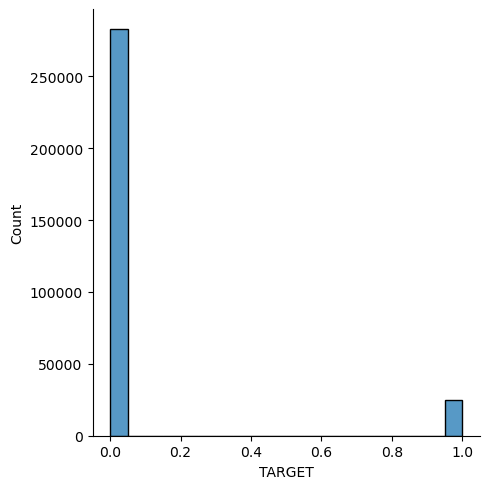

In [170]:
#Visualize using displot for Target
sb.displot(app_bur.TARGET)

# Feature Engineering

# Imputing Missing Values

In [171]:
# Check for missing values in each feature
missing_values = app_bur.isnull().sum()

# Get the percentage of missing values for each feature
missing_percentage = (missing_values / len(app_bur)) * 100

# Create a DataFrame to display missing values information
missing_data_info = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})
print(missing_data_info)

                            Missing Values  Missing Percentage
TARGET                                   0            0.000000
NAME_CONTRACT_TYPE_x                     0            0.000000
CODE_GENDER                              0            0.000000
FLAG_OWN_CAR                             0            0.000000
FLAG_OWN_REALTY                          0            0.000000
...                                    ...                 ...
CNT_DRAWINGS_ATM_CURRENT            305306           99.282952
CNT_DRAWINGS_CURRENT                305208           99.251084
CNT_DRAWINGS_OTHER_CURRENT          305306           99.282952
CNT_DRAWINGS_POS_CURRENT            305306           99.282952
CNT_INSTALMENT_MATURE_CUM           305244           99.262791

[194 rows x 2 columns]


We will extract the features from above details. We will removing all the features which is having missing values more than 40%.

In [172]:
# Set the threshold for missing values (40% in this case)
threshold = 0.4 

In [173]:
# Identify columns exceeding the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index

In [174]:
columns_to_drop

Index(['NAME_TYPE_SUITE_x', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       ...
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM'],
      dtype='object', length=131)

In [175]:
# Drop the identified columns from the DataFrame
app_bur.drop(columns=columns_to_drop, inplace=True)

In [176]:
app_bur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 63 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   TARGET                        307511 non-null  int64  
 1   NAME_CONTRACT_TYPE_x          307511 non-null  object 
 2   CODE_GENDER                   307511 non-null  object 
 3   FLAG_OWN_CAR                  307511 non-null  object 
 4   FLAG_OWN_REALTY               307511 non-null  object 
 5   CNT_CHILDREN                  307511 non-null  int64  
 6   AMT_INCOME_TOTAL              307511 non-null  float64
 7   AMT_CREDIT_x                  307511 non-null  float64
 8   AMT_ANNUITY                   307499 non-null  float64
 9   AMT_GOODS_PRICE_x             307233 non-null  float64
 10  NAME_INCOME_TYPE              307511 non-null  object 
 11  NAME_EDUCATION_TYPE           307511 non-null  object 
 12  NAME_FAMILY_STATUS            307511 non-nul

In [177]:
app_bur.shape

(307511, 63)

In [178]:
# Check for missing values in each feature
missing_values1 = app_bur.isnull().sum()

# Get the percentage of missing values for each feature
missing_percentage1 = (missing_values1 / len(app_bur)) * 100

# Create a DataFrame to display missing values information
missing_data_info1 = pd.DataFrame({'Missing Values': missing_values1, 'Missing Percentage': missing_percentage1})
print(missing_data_info1)

                      Missing Values  Missing Percentage
TARGET                             0                 0.0
NAME_CONTRACT_TYPE_x               0                 0.0
CODE_GENDER                        0                 0.0
FLAG_OWN_CAR                       0                 0.0
FLAG_OWN_REALTY                    0                 0.0
...                              ...                 ...
FLAG_DOCUMENT_17                   0                 0.0
FLAG_DOCUMENT_18                   0                 0.0
FLAG_DOCUMENT_19                   0                 0.0
FLAG_DOCUMENT_20                   0                 0.0
FLAG_DOCUMENT_21                   0                 0.0

[63 rows x 2 columns]


In [179]:
#Check the distribution of numerical features
app_bur.describe()

TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
count  307511.000000  307511.000000      3.075110e+05  3.075110e+05   
mean        0.080729       0.417052      1.687979e+05  5.990260e+05   
std         0.272419       0.722121      2.371231e+05  4.024908e+05   
min         0.000000       0.000000      2.565000e+04  4.500000e+04   
25%         0.000000       0.000000      1.125000e+05  2.700000e+05   
50%         0.000000       0.000000      1.471500e+05  5.135310e+05   
75%         0.000000       1.000000      2.025000e+05  8.086500e+05   
max         1.000000      19.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  \
count  307499.000000       3.072330e+05               307511.000000   
mean    27108.573909       5.383962e+05                    0.020868   
std     14493.737315       3.694465e+05                    0.013831   
min      1615.500000       4.050000e+04                    0.000290   
25%     16524.000000       2.385000e+05                    0.010006   
50%     24903.000000       4.500000e+05                    0.018850   
75%     34596.000000       6.795000e+05                    0.028663   
max    258025.500000       4.050000e+06                    0.072508   

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean   -16036.995067   63815.045904       -4986.120328     -2994.202373   
std      4363.988632  141275.766519        3522.886321      1509.450419   
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000   
25%    -19682.000000   -2760.000000       -7479.500000     -4299.000000   
50%    -15750.000000   -1213.000000       -4504.000000     -3254.000000   
75%    -12413.000000    -289.000000       -2010.000000     -1720.000000   
max     -7489.000000  365243.000000           0.000000         0.000000   

          FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
count  307511.000000   307511.000000    307511.000000     307511.000000   
mean        0.999997        0.819889         0.199368          0.998133   
std         0.001803        0.384280         0.399526          0.043164   
min         0.000000        0.000000         0.000000          0.000000   
25%         1.000000        1.000000         0.000000          1.000000   
50%         1.000000        1.000000         0.000000          1.000000   
75%         1.000000        1.000000         0.000000          1.000000   
max         1.000000        1.000000         1.000000          1.000000   

          FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000  307511.000000    307509.000000         307511.000000   
mean        0.281066       0.056720         2.152665              2.052463   
std         0.449521       0.231307         0.910682              0.509034   
min         0.000000       0.000000         1.000000              1.000000   
25%         0.000000       0.000000         2.000000              2.000000   
50%         0.000000       0.000000         2.000000              2.000000   
75%         1.000000       0.000000         3.000000              2.000000   
max         1.000000       1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START_x  \
count                307511.000000              307511.000000   
mean                      2.031521                  12.063419   
std                       0.502737                   3.265832   
min                       1.000000                   0.000000   
25%                       2.000000                  10.000000   
50%                       2.000000                  12.000000   
75%                       2.000000                  14.000000   
max                       3.000000                  23.000000   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count               307511.0

In [180]:
#To see the Distribution of Categorical features
app_bur.describe(include=['O'])

NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count                307511      307511       307511          307511   
unique                    2           3            2               2   
top              Cash loans           F            N               Y   
freq                 278232      202448       202924          213312   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
count            307511                         307511             307511   
unique                8                              5                  6   
top             Working  Secondary / secondary special            Married   
freq             158774                         218391             196432   

        NAME_HOUSING_TYPE WEEKDAY_APPR_PROCESS_START_x       ORGANIZATION_TYPE  
count              307511                       307511                  307511  
unique                  6                            7                      58  
top     House / apartment                      TUESDAY  Business Entity Type 3  
freq               272868                        53901                   67992

In [181]:
# Calculate the median for each numerical column
numerical_columns = app_bur.select_dtypes(include=['int64', 'float64']).columns
median_values = app_bur[numerical_columns].median()

# Impute missing values with the median
app_bur[numerical_columns] = app_bur[numerical_columns].fillna(median_values)

In [182]:
# Calculate the mode for each categorical column
categorical_columns = app_bur.select_dtypes(include=['object']).columns

# Impute missing values with the mode
for col in categorical_columns:
    mode_value = app_bur[col].mode()[0]
    app_bur[col] = app_bur[col].fillna(mode_value)

In [183]:
#recheck missing values
app_bur.isnull().sum()

TARGET                  0
NAME_CONTRACT_TYPE_x    0
CODE_GENDER             0
FLAG_OWN_CAR            0
FLAG_OWN_REALTY         0
                       ..
FLAG_DOCUMENT_17        0
FLAG_DOCUMENT_18        0
FLAG_DOCUMENT_19        0
FLAG_DOCUMENT_20        0
FLAG_DOCUMENT_21        0
Length: 63, dtype: int64

In [184]:
#datatype of features
app_bur.dtypes

TARGET                   int64
NAME_CONTRACT_TYPE_x    object
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
                         ...  
FLAG_DOCUMENT_17         int64
FLAG_DOCUMENT_18         int64
FLAG_DOCUMENT_19         int64
FLAG_DOCUMENT_20         int64
FLAG_DOCUMENT_21         int64
Length: 63, dtype: object

# Label Encoding

In [185]:
#importing required library for label encoding 
from sklearn.preprocessing import LabelEncoder

In [186]:
#Encoding with all categorical columns
label_encoders = {}

for col in categorical_columns:
    label_encoder = LabelEncoder()
    app_bur[col] = label_encoder.fit_transform(app_bur[col])
    label_encoders[col] = label_encoder

In [187]:
app_bur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 63 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   TARGET                        307511 non-null  int64  
 1   NAME_CONTRACT_TYPE_x          307511 non-null  int64  
 2   CODE_GENDER                   307511 non-null  int64  
 3   FLAG_OWN_CAR                  307511 non-null  int64  
 4   FLAG_OWN_REALTY               307511 non-null  int64  
 5   CNT_CHILDREN                  307511 non-null  int64  
 6   AMT_INCOME_TOTAL              307511 non-null  float64
 7   AMT_CREDIT_x                  307511 non-null  float64
 8   AMT_ANNUITY                   307511 non-null  float64
 9   AMT_GOODS_PRICE_x             307511 non-null  float64
 10  NAME_INCOME_TYPE              307511 non-null  int64  
 11  NAME_EDUCATION_TYPE           307511 non-null  int64  
 12  NAME_FAMILY_STATUS            307511 non-nul

In [188]:
#set to display maximum rows
pd.set_option('display.max_rows', None) ## displaying all rows

In [189]:
app_bur.corr()

TARGET  NAME_CONTRACT_TYPE_x  CODE_GENDER  \
TARGET                        1.000000             -0.030896     0.054692   
NAME_CONTRACT_TYPE_x         -0.030896              1.000000    -0.008613   
CODE_GENDER                   0.054692             -0.008613     1.000000   
FLAG_OWN_CAR                 -0.021851              0.004022     0.345833   
FLAG_OWN_REALTY              -0.006148              0.067177    -0.044340   
CNT_CHILDREN                  0.019187              0.029998     0.047403   
AMT_INCOME_TOTAL             -0.003982             -0.003531     0.074728   
AMT_CREDIT_x                 -0.030369             -0.221648     0.021572   
AMT_ANNUITY                  -0.012815             -0.241541     0.076960   
AMT_GOODS_PRICE_x            -0.039623             -0.185711     0.022495   
NAME_INCOME_TYPE              0.046829              0.005428     0.065089   
NAME_EDUCATION_TYPE           0.054699             -0.065086     0.009554   
NAME_FAMILY_STATUS           -0.004127              0.011272    -0.099713   
NAME_HOUSING_TYPE             0.034489              0.024190     0.058767   
REGION_POPULATION_RELATIVE   -0.037227              0.026867     0.014082   
DAYS_BIRTH                    0.078239              0.086364     0.148080   
DAYS_EMPLOYED                -0.044932             -0.054450    -0.156018   
DAYS_REGISTRATION             0.041975              0.020557     0.077191   
DAYS_ID_PUBLISH               0.051457              0.052847     0.000130   
FLAG_MOBIL                    0.000534              0.000585    -0.002503   
FLAG_EMP_PHONE                0.045982              0.054938     0.157253   
FLAG_WORK_PHONE               0.028524             -0.033647     0.034030   
FLAG_CONT_MOBILE              0.000370             -0.097116    -0.006017   
FLAG_PHONE                   -0.023806             -0.021378    -0.019429   
FLAG_EMAIL                   -0.001758             -0.010811     0.018218   
CNT_FAM_MEMBERS               0.009308              0.011365     0.080573   
REGION_RATING_CLIENT          0.058899             -0.021593    -0.017862   
REGION_RATING_CLIENT_W_CITY   0.060893             -0.023116    -0.017263   
WEEKDAY_APPR_PROCESS_START_x  0.004002             -0.006925    -0.000271   
HOUR_APPR_PROCESS_START_x    -0.024166              0.035897     0.007177   
REG_REGION_NOT_LIVE_REGION    0.005576              0.018561     0.023683   
REG_REGION_NOT_WORK_REGION    0.006942              0.015774     0.103437   
LIVE_REGION_NOT_WORK_REGION   0.002819              0.007941     0.106060   
REG_CITY_NOT_LIVE_CITY        0.044395              0.013586     0.048237   
REG_CITY_NOT_WORK_CITY        0.050994              0.004487     0.137541   
LIVE_CITY_NOT_WORK_CITY       0.032518             -0.004999     0.133239   
ORGANIZATION_TYPE            -0.030765             -0.040187    -0.163879   
EXT_SOURCE_2                 -0.160295              0.015941    -0.014711   
OBS_30_CNT_SOCIAL_CIRCLE      0.009447             -0.024713    -0.007267   
DEF_30_CNT_SOCIAL_CIRCLE      0.032394             -0.011756    -0.017889   
OBS_60_CNT_SOCIAL_CIRCLE      0.009337             -0.024869    -0.007175   
DEF_60_CNT_SOCIAL_CIRCLE      0.031401             -0.009268    -0.014612   
DAYS_LAST_PHONE_CHANGE        0.055218              0.061830     0.025290   
FLAG_DOCUMENT_2               0.005417             -0.002109    -0.001520   
FLAG_DOCUMENT_3               0.044346             -0.479724    -0.087338   
FLAG_DOCUMENT_4              -0.002672              0.004448    -0.002693   
FLAG_DOCUMENT_5              -0.000316              0.029372     0.003255   
FLAG_DOCUMENT_6              -0.028602             -0.098808    -0.100766   
FLAG_DOCUMENT_7              -0.001520              0.042703    -0.002059   
FLAG_DOCUMENT_8              -0.008040             -0.084961     0.249767   
FLAG_DOCUMENT_9              -0.004352             -0.006592    -0.008070   
FLAG_DOCUMENT_10            

# PCA

We are going to perform PCA technique to reducing dimensions of data.

PCA is a technique widely used in machine learning to smartly reduce the dimensionality of large dataset while losing the least amount of information possible. One use of PCA is for data visualization.

# Splitting the Data

In [190]:
#splitting the data
X = app_bur.drop('TARGET', axis =1)
X.head()

NAME_CONTRACT_TYPE_x  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                     0            1             0                1   
1                     0            0             0                0   
2                     1            1             1                1   
3                     0            0             0                1   
4                     0            1             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY  \
0             0          202500.0      406597.5      24700.5   
1             0          270000.0     1293502.5      35698.5   
2             0           67500.0      135000.0       6750.0   
3             0          135000.0      312682.5      29686.5   
4             0          121500.0      513000.0      21865.5   

   AMT_GOODS_PRICE_x  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0           351000.0                 7                    4   
1          1129500.0                 4                    1   
2           135000.0                 7                    4   
3           297000.0                 7                    4   
4           513000.0                 7                    4   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0                   3                  1                    0.018801   
1                   1                  1                    0.003541   
2                   3                  1                    0.010032   
3                   0                  1                    0.008019   
4                   3                  1                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0       -9461           -637            -3648.0            -2120           1   
1      -16765          -1188            -1186.0             -291           1   
2      -19046           -225            -4260.0            -2531           1   
3      -19005          -3039            -9833.0            -2437           1   
4      -19932          -3038            -4311.0            -3458           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   

   WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                             6                         10   
1                             1                         11   
2                             1                          9   
3                             6                         17   
4                             4                         11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3     

In [191]:
#target data
y = app_bur[['TARGET']]
y.head()

TARGET
0       1
1       0
2       0
3       0
4       0

In [192]:
#importing required libraries for PCA and scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# PCA without Scaling data

In [193]:
# Apply PCA to the without scaled data
pca = PCA(0.95)  # n is the number of components you want to retain
X_pca1 = pca.fit_transform(X)
X_pca1.shape

(307511, 3)

In [194]:
#The variance explained by each component
pca.explained_variance_ratio_

array([0.79606661, 0.14562024, 0.05278501])

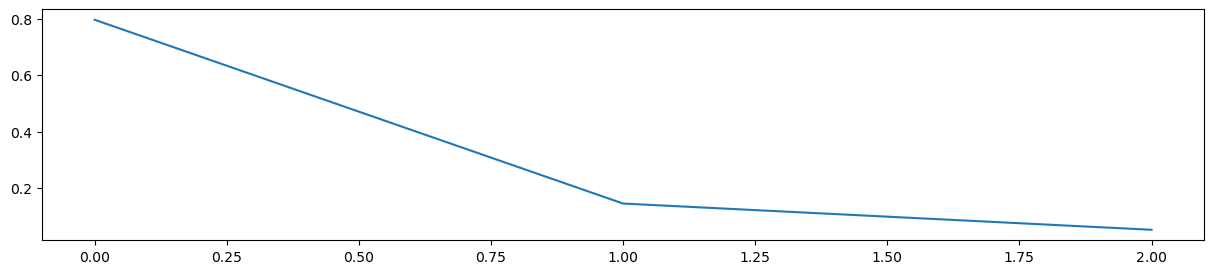

In [195]:
# Plot the variance explained by each component
plt.plot(pca.explained_variance_ratio_)

In [196]:
#importing required library for train_test_split 
from sklearn.model_selection import train_test_split

In [197]:
X_train_pca1, X_test_pca1, y_train, y_test = train_test_split(X_pca1, y, test_size = 0.2, random_state=42)

In [198]:
X_train_pca1.shape, X_test_pca1.shape, y_train.shape, y_test.shape

((246008, 3), (61503, 3), (246008, 1), (61503, 1))

# 1st Model without scaling and without balacing data

In [199]:
#importing required libraries for model selection and predicting the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [200]:
model_pca1 = LogisticRegression()
model_pca1.fit(X_train_pca1, y_train)

LogisticRegression()

In [201]:
#predictions for trained model
pred_pca1 = model_pca1.predict(X_train_pca1)
f1_score(y_train, pred_pca1)

0.16848435728926237

In [202]:
#predictions for test model
pred_test_pca1 = model_pca1.predict(X_test_pca1)
f1_score(y_test, pred_test_pca1)

0.16499172243337143

In [203]:
confusion_matrix(y_test, pred_test_pca1)

array([[22154, 34400],
       [ 1411,  3538]])

From above matrix, we have misclassifications.False Negative which is False Prediction count is 1411.We should be ideally change to False Negative as Zero.We should predict probability based on data.

In [204]:
print(classification_report(y_test, pred_test_pca1))

              precision    recall  f1-score   support

           0       0.94      0.39      0.55     56554
           1       0.09      0.71      0.16      4949

    accuracy                           0.42     61503
   macro avg       0.52      0.55      0.36     61503
weighted avg       0.87      0.42      0.52     61503



Our first model accuracy score is 42% which is for imbalanced and without scaled data.It shows very bad model.

In [205]:
model_pca1.predict_proba(X_test_pca1)[:,1]

array([0.50867055, 0.48639476, 0.50732799, ..., 0.4814862 , 0.4897597 ,
       0.50885024])

In [206]:
def predict_threshold(model_pca1, X_test_pca1, thresholds):
    import numpy as np
    return np.where(model_pca1.predict_proba(X_test_pca1)[:,1]>thresholds,1,0)

In [207]:
import numpy as np
from sklearn.metrics import confusion_matrix

for thr in np.arange(0,1.0,0.1):
    y_pred_thr2 = predict_threshold(model_pca1, X_test_pca1, thr)
    print("Threshold:", thr)
    print(confusion_matrix(y_test, y_pred_thr2))

Threshold: 0.0
[[    0 56554]
 [    0  4949]]
Threshold: 0.1
[[    0 56554]
 [    1  4948]]
Threshold: 0.2
[[    1 56553]
 [    1  4948]]
Threshold: 0.30000000000000004
[[    1 56553]
 [    1  4948]]
Threshold: 0.4
[[    5 56549]
 [    1  4948]]
Threshold: 0.5
[[22154 34400]
 [ 1411  3538]]
Threshold: 0.6000000000000001
[[56554     0]
 [ 4949     0]]
Threshold: 0.7000000000000001
[[56554     0]
 [ 4949     0]]
Threshold: 0.8
[[56554     0]
 [ 4949     0]]
Threshold: 0.9
[[56554     0]
 [ 4949     0]]


In [208]:
#Finding False Positive Rate, True Positive Rate and thresholds
tpr2, fpr2, thresholds2 = roc_curve(y_test,model_pca1.predict_proba(X_test_pca1)[:,1])

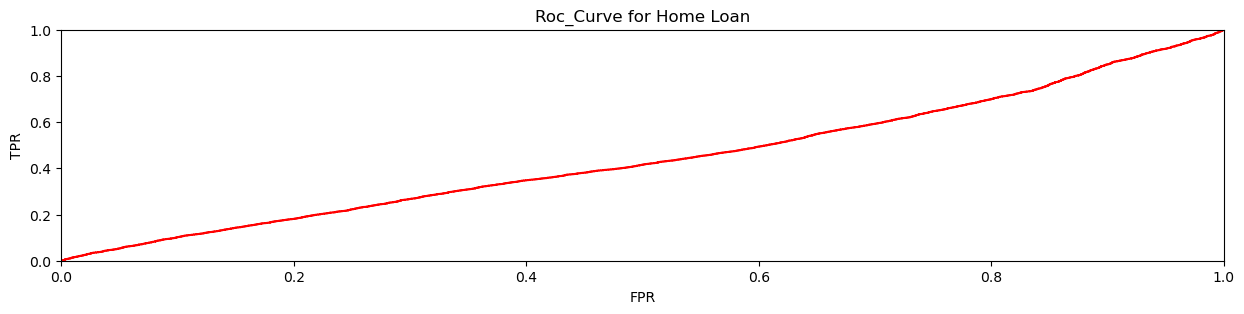

In [209]:
#Graph for ROC_CURVE for home loan classifier
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.0])
plt.title('Roc_Curve for Home Loan')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr2, tpr2, color ='Red')
plt.show()

In [210]:
roc_auc_score(y_test,model_pca1.predict_proba(X_test_pca1)[:,1])

0.5559707745888567

We got roc_auc_score is 56% which shows the model is bad.So we will balance the data using class_weight parameter while model selection.

# 2nd Model with Balance and without scaling data

In [211]:
#Model selection
model_pca2 = LogisticRegression(class_weight='balanced')
model_pca2.fit(X_train_pca1, y_train)

LogisticRegression(class_weight='balanced')

In [212]:
#predictions for trained model
pred_pca2 = model_pca2.predict(X_train_pca1)
f1_score(y_train, pred_pca2, average='weighted')

0.5271428968281199

In [213]:
#predictions for test model
pred_test_pca2 = model_pca2.predict(X_test_pca1)
f1_score(y_test, pred_test_pca2, average='weighted')

0.5210538224740605

In [214]:
confusion_matrix(y_test, pred_test_pca2)

array([[22108, 34446],
       [ 1408,  3541]])

False Negative is 1408 from above matrix.

In [215]:
print(classification_report(y_test, pred_test_pca2))

              precision    recall  f1-score   support

           0       0.94      0.39      0.55     56554
           1       0.09      0.72      0.16      4949

    accuracy                           0.42     61503
   macro avg       0.52      0.55      0.36     61503
weighted avg       0.87      0.42      0.52     61503



2nd model accuracy score is 42%.

In [216]:
model_pca2.predict_proba(X_test_pca1)[:,1]

array([0.52746578, 0.45275327, 0.52360453, ..., 0.42929046, 0.47668794,
       0.53298277])

In [217]:
def predict_threshold(model_pca2, X_test_pca1, thresholds):
    import numpy as np
    return np.where(model_pca2.predict_proba(X_test_pca1)[:,1]>thresholds,1,0)

In [218]:
import numpy as np
from sklearn.metrics import confusion_matrix

for thr in np.arange(0,1.0,0.1):
    y_pred_thr3 = predict_threshold(model_pca2, X_test_pca1, thr)
    print("Threshold:", thr)
    print(confusion_matrix(y_test, y_pred_thr3))

Threshold: 0.0
[[    0 56554]
 [    0  4949]]
Threshold: 0.1
[[    4 56550]
 [    1  4948]]
Threshold: 0.2
[[   17 56537]
 [    1  4948]]
Threshold: 0.30000000000000004
[[  186 56368]
 [    7  4942]]
Threshold: 0.4
[[ 4660 51894]
 [  253  4696]]
Threshold: 0.5
[[22108 34446]
 [ 1408  3541]]
Threshold: 0.6000000000000001
[[56554     0]
 [ 4949     0]]
Threshold: 0.7000000000000001
[[56554     0]
 [ 4949     0]]
Threshold: 0.8
[[56554     0]
 [ 4949     0]]
Threshold: 0.9
[[56554     0]
 [ 4949     0]]


In [219]:
#Finding True Positive Rate, False Positive Rate and Thresholds
tpr3, fpr3, thresholds3 = roc_curve(y_test,model_pca2.predict_proba(X_test_pca1)[:,1])

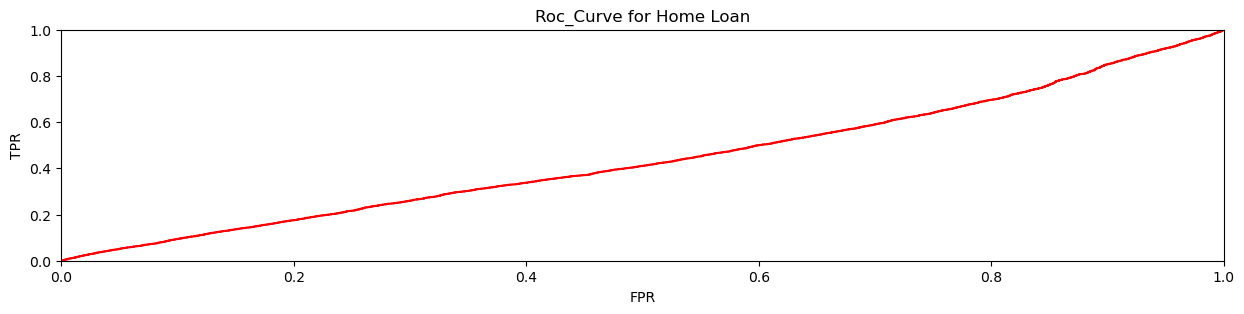

In [220]:
#Graph for Roc_curve for Home loan classifier
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.0])
plt.title('Roc_Curve for Home Loan')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr3, tpr3, color ='Red')
plt.show()

In [221]:
roc_auc_score(y_test,model_pca2.predict_proba(X_test_pca1)[:,1])

0.5594908538143275

We got roc_auc_score is 56% which shows the model is bad still after balancing the data.So we will Scale the data using preprocessing.

# 3rd Model with Scaled but without balancing

In [222]:
# Assuming X is your data matrix (features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to the scaled data
pca = PCA(0.95)  # n is the number of components you want to retain
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(307511, 48)

In [223]:
#The variance explained by each component
pca.explained_variance_ratio_

array([0.07659607, 0.05464685, 0.04254021, 0.03971209, 0.0354054 ,
       0.03176178, 0.0275482 , 0.02387092, 0.02261303, 0.02215784,
       0.02152246, 0.02043682, 0.01954726, 0.01800366, 0.0175563 ,
       0.01718211, 0.01699067, 0.01653215, 0.01635536, 0.0162682 ,
       0.01621464, 0.01619835, 0.01615222, 0.01613691, 0.01613252,
       0.01613091, 0.01611921, 0.01604938, 0.01603114, 0.01601563,
       0.01596573, 0.01588942, 0.01534991, 0.01508993, 0.01505755,
       0.01475032, 0.01442053, 0.01419675, 0.01372567, 0.01366521,
       0.01292668, 0.01245736, 0.01219019, 0.01154236, 0.01084986,
       0.01074103, 0.01030083, 0.00994763])

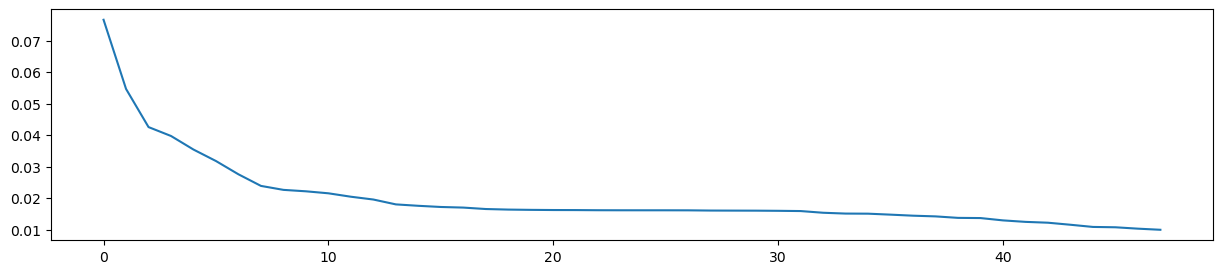

In [224]:
# Plot the variance explained by each component
plt.plot(pca.explained_variance_ratio_)

In [225]:
#Train_test_split data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state=42)

In [226]:
#dimensions of data
X_train_pca.shape, X_test_pca.shape, y_train.shape, y_test.shape

((246008, 48), (61503, 48), (246008, 1), (61503, 1))

In [227]:
#model selection
model1 = LogisticRegression()
model1.fit(X_train_pca, y_train)

LogisticRegression()

In [228]:
#predictions for trained model
pred1 = model1.predict(X_train_pca)
f1_score(y_train, pred1)

0.000502790487203982

In [229]:
#predictions for test model
pred_test1 = model1.predict(X_test_pca)
f1_score(y_test, pred_test1)

0.00040355125100887806

In [230]:
confusion_matrix(y_test, pred_test1)

array([[56548,     6],
       [ 4948,     1]])

Here False prediction value is 4948. This should be reduced using thresholds and evaluating roc-auc score.

In [231]:
print(classification_report(y_test, pred_test1))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.14      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.53      0.50      0.48     61503
weighted avg       0.86      0.92      0.88     61503



In 3rd model, which is the model is scaled and witout balancing got accuracy score is 92%. Then this model is very good.But misclassification should be reduced.

In [232]:
model1.score(X_test_pca, y_test)

0.9194510836869746

In [233]:
model1.predict_proba(X_test_pca)[:,1]

array([0.09322348, 0.05867524, 0.07877248, ..., 0.05040695, 0.13393733,
       0.03638235])

In [234]:
def predict_threshold(model1, X_test_pca, thresholds):
    import numpy as np
    return np.where(model1.predict_proba(X_test_pca)[:,1]>thresholds,1,0)

In [235]:
import numpy as np
from sklearn.metrics import confusion_matrix

for thr in np.arange(0,1.0,0.1):
    y_pred_thr = predict_threshold(model1, X_test_pca, thr)
    print("Threshold:", thr)
    print(confusion_matrix(y_test, y_pred_thr))

Threshold: 0.0
[[    1 56553]
 [    0  4949]]
Threshold: 0.1
[[43318 13236]
 [ 2422  2527]]
Threshold: 0.2
[[54307  2247]
 [ 4162   787]]
Threshold: 0.30000000000000004
[[56220   334]
 [ 4792   157]]
Threshold: 0.4
[[56513    41]
 [ 4933    16]]
Threshold: 0.5
[[56548     6]
 [ 4948     1]]
Threshold: 0.6000000000000001
[[56551     3]
 [ 4948     1]]
Threshold: 0.7000000000000001
[[56553     1]
 [ 4948     1]]
Threshold: 0.8
[[56553     1]
 [ 4948     1]]
Threshold: 0.9
[[56553     1]
 [ 4948     1]]


In [236]:
#Finding TPR, FPR and Thresholds
tpr, fpr, thresholds = roc_curve(y_test,model1.predict_proba(X_test_pca)[:,1])

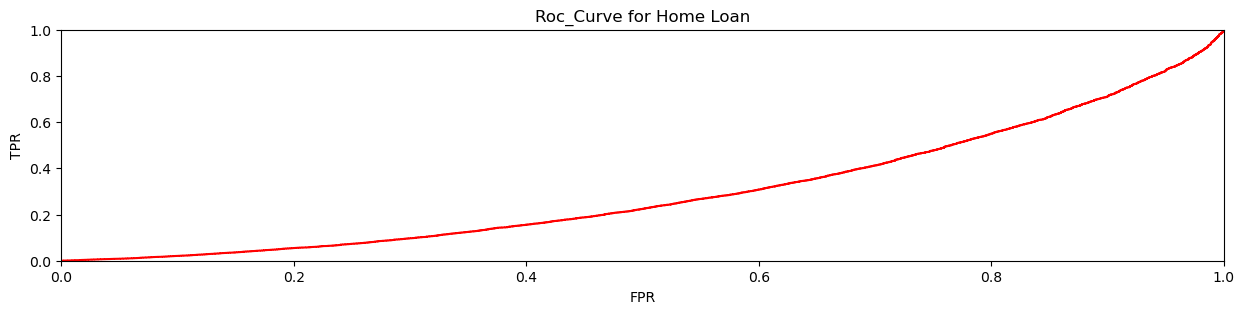

In [237]:
#Graph for Roc_Curve for Home loan classifier
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.0])
plt.title('Roc_Curve for Home Loan')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr, tpr, color ='Red')
plt.show()

In [238]:
roc_auc_score(y_test,model1.predict_proba(X_test_pca)[:,1])

0.7000934409857371

We got Roc_Auc score is 70% which shows this model is good. But still to get better score we will balance the data using class_weight parameter and will evaluate.

# 4th Model with Scaling and with Balancing

In [239]:
#Model Selection
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_pca, y_train)

LogisticRegression(class_weight='balanced')

In [240]:
#predictions for trained model
pred = model.predict(X_train_pca)
f1_score(y_train, pred, average = 'weighted')

0.7362887834135218

In [241]:
#predictions for test model
pred_test = model.predict(X_test_pca)
f1_score(y_test, pred_test, average = 'weighted')

0.7369138198710937

In [242]:
confusion_matrix(y_test, pred_test)

array([[37414, 19140],
       [ 1813,  3136]])

From above matrix, we have misclassifications.

In [243]:
model.score(X_test_pca, y_test)

0.6593174316699998

In [244]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.95      0.66      0.78     56554
           1       0.14      0.63      0.23      4949

    accuracy                           0.66     61503
   macro avg       0.55      0.65      0.51     61503
weighted avg       0.89      0.66      0.74     61503



In 4th model which is Scaled and Balanced data, we got accuracy score is 66%. It shows Fair model.We will perform
Roc_Auc score to reducing misclassifications.

In [245]:
model.predict_proba(X_test_pca)[:,1]

array([0.5354269 , 0.40127435, 0.48396422, ..., 0.38669667, 0.63336129,
       0.30192752])

In [246]:
def predict_threshold(model, X_test_pca, thresholds):
    import numpy as np
    return np.where(model.predict_proba(X_test_pca)[:,1]>thresholds,1,0)

In [247]:
import numpy as np
from sklearn.metrics import confusion_matrix

for thr in np.arange(0,1.0,0.1):
    y_pred_thr1 = predict_threshold(model, X_test_pca, thr)
    print("Threshold:", thr)
    print(confusion_matrix(y_test, y_pred_thr1))

Threshold: 0.0
[[    8 56546]
 [    0  4949]]
Threshold: 0.1
[[   64 56490]
 [    0  4949]]
Threshold: 0.2
[[ 2209 54345]
 [   31  4918]]
Threshold: 0.30000000000000004
[[11039 45515]
 [  295  4654]]
Threshold: 0.4
[[24541 32013]
 [  917  4032]]
Threshold: 0.5
[[37414 19140]
 [ 1813  3136]]
Threshold: 0.6000000000000001
[[46817  9737]
 [ 2839  2110]]
Threshold: 0.7000000000000001
[[52747  3807]
 [ 3786  1163]]
Threshold: 0.8
[[55778   776]
 [ 4594   355]]
Threshold: 0.9
[[56532    22]
 [ 4939    10]]


In [248]:
#Finding TPR, FPR and Thresholds
tpr1, fpr1, thresholds1 = roc_curve(y_test,model.predict_proba(X_test_pca)[:,1])

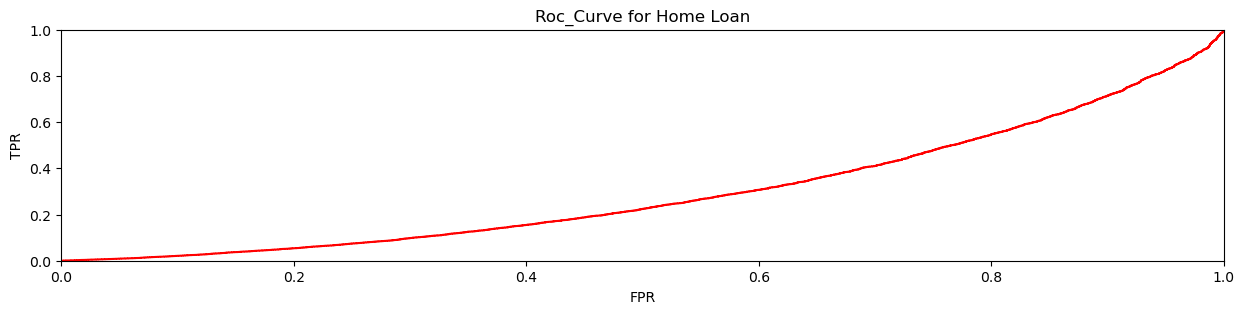

In [249]:
#Graph for Roc_Curve for Home Loan Classifier
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.0])
plt.title('Roc_Curve for Home Loan')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr1, tpr1, color ='Red')
plt.show()

In [250]:
roc_auc_score(y_test,model.predict_proba(X_test_pca)[:,1])

0.7008014584636976

Roc_Auc_score is 70% which shows this model is good.

# 5th Model - Random Forest Classifier

In [251]:
#importing required library for random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [252]:
#model selection
model_rf  =  RandomForestClassifier(n_estimators=10,criterion='gini',max_depth=20, class_weight='balanced')

In [253]:
#trained the model
model_rf.fit(X_train_pca, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=10)

In [254]:
#evaluating the model
y_train_pred_rf  = model_rf.predict(X_train_pca)
y_test_pred_rf  =  model_rf.predict(X_test_pca)

In [255]:
print(accuracy_score(y_train, y_train_pred_rf))

0.9619361971968391


In [256]:
print(accuracy_score(y_test , y_test_pred_rf))

0.8884119473846804


In [257]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     56554
           1       0.21      0.14      0.17      4949

    accuracy                           0.89     61503
   macro avg       0.57      0.55      0.55     61503
weighted avg       0.87      0.89      0.88     61503



We got accuracy score is 89% in Random Forest Classifier with scaled and balanced data.

In [258]:
print(confusion_matrix(y_test, y_test_pred_rf))

[[53952  2602]
 [ 4261   688]]


False Negative is 4236 which should be reduced. Now we will perform Roc-Auc-Score

In [259]:
model_rf.predict_proba(X_test_pca)[:,1]

array([0.38997689, 0.15643055, 0.23855798, ..., 0.21870426, 0.30267675,
       0.03665683])

In [260]:
def predict_threshold(model_rf, X_test_pca, thresholds):
    import numpy as np
    return np.where(model_rf.predict_proba(X_test_pca)[:,1]>thresholds,1,0)

In [261]:
import numpy as np
from sklearn.metrics import confusion_matrix

for thr in np.arange(0,1.0,0.1):
    y_pred_rf_thr = predict_threshold(model_rf, X_test_pca, thr)
    print("Threshold:", thr)
    print(confusion_matrix(y_test, y_pred_rf_thr))

Threshold: 0.0
[[ 3986 52568]
 [  186  4763]]
Threshold: 0.1
[[19931 36623]
 [ 1024  3925]]
Threshold: 0.2
[[35367 21187]
 [ 2095  2854]]
Threshold: 0.30000000000000004
[[45429 11125]
 [ 2990  1959]]
Threshold: 0.4
[[51005  5549]
 [ 3733  1216]]
Threshold: 0.5
[[53952  2602]
 [ 4261   688]]
Threshold: 0.6000000000000001
[[55485  1069]
 [ 4612   337]]
Threshold: 0.7000000000000001
[[56239   315]
 [ 4835   114]]
Threshold: 0.8
[[56492    62]
 [ 4923    26]]
Threshold: 0.9
[[56554     0]
 [ 4949     0]]


In [262]:
#Finding TPR, FPR and Thresholds
tpr_rf, fpr_rf, thresholds_rf = roc_curve(y_test,model_rf.predict_proba(X_test_pca)[:,1])

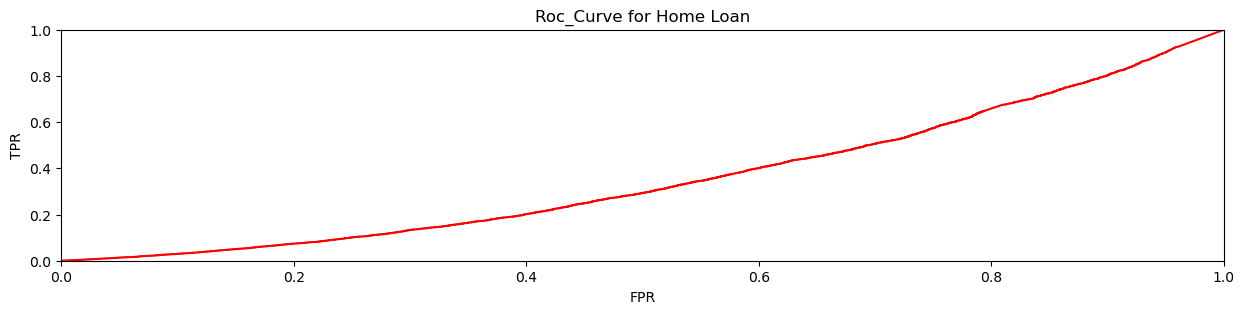

In [263]:
#Graph for Roc_Curve for Home Loan Classifier
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.0])
plt.title('Roc_Curve for Home Loan')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_rf, tpr_rf, color ='Red')
plt.show()

In [264]:
roc_auc_score(y_test,model_rf.predict_proba(X_test_pca)[:,1])

0.6416205311148642

Roc_Auc_Score is 64% for RFC model which shows this model is fair.

From the roc curve the model predicts both the train and test set by the same way (auc_score=64%) so there is no problem of overfitting . But from the evaluation with the confusion matrix the model doesn't perform well as we expect on the positive class(it missclassified) .The model doesn't improve the roc score after tuning because we used small number of iterations to check from a hyperparamter space contains hundreds of thousands of combinaision and this is because the big training time to run this huge number of models wich is time consuming and can take many days to complete.

# 6. XGB Classifier

In [265]:
#importing required library for xgboost
from xgboost import XGBClassifier

In [266]:
#Model selection
model_xgb  =  XGBClassifier(objective ='binary:logistic', max_depth = 4, learning_rate = 0.7, n_estimators = 10)

In [267]:
model_xgb.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.7, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [268]:
pred_xgb = model_xgb.predict(X_test_pca)

In [269]:
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.21      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.57      0.50      0.48     61503
weighted avg       0.86      0.92      0.88     61503



In [270]:
print(confusion_matrix(y_test, pred_xgb))

[[56543    11]
 [ 4946     3]]


In [271]:
roc_auc_score(y_test,model_xgb.predict_proba(X_test_pca)[:,1])

0.6866843479767634

XGB Classifier : 92% and Roc_Auc_score is 69%.

# Conclusion

We started our analysis with an Exploratory Data Analysis (EDA) phase, where we examined the dataset using summary statistics and visualizations to gain insights into the data distribution and identify any patterns or anomalies. Based on the findings from EDA, we performed data preprocessing steps, which included dropping duplicate rows, handling missing values through dropping and imputation techniques, as well as addressing errors and anomalies in the data.

Moving on to the modeling phase, we began by implementing a simple modeling approach using basic estimators. This allowed us to gauge the initial performance and understand the predictive power of the individual models. We then progressed to ensemble methods, specifically Random Forest and XGBoost, which leverage the collective strength of multiple models.

To evaluate the models, we visualized their performance using Receiver Operating Characteristic (ROC) curves, which illustrate the trade-off between true positive rate and false positive rate. Additionally, we analyzed the confusion matrices to assess the model's predictive accuracy in classifying the target variable.

Furthermore, we extract the data using PCA technique to reduce dimensions. This provided insights(95%) into the variables that significantly influenced the model's predictions and aided in understanding the underlying relationships in the data.

These machine learning algorithms are best for classification and labelled data. The train and test data are divided and fitted into the model and passed through the machine learning. Since we have already noted the severe imbalance in the values within the target variable, we implement the Class_weight technique in the dealing with this skewed value via the learn Python package. The predicted data and test data achieved the accuracy rate of,

# Feature Importance Plot

In [284]:
explained_variance_ratio = pca.explained_variance_ratio_

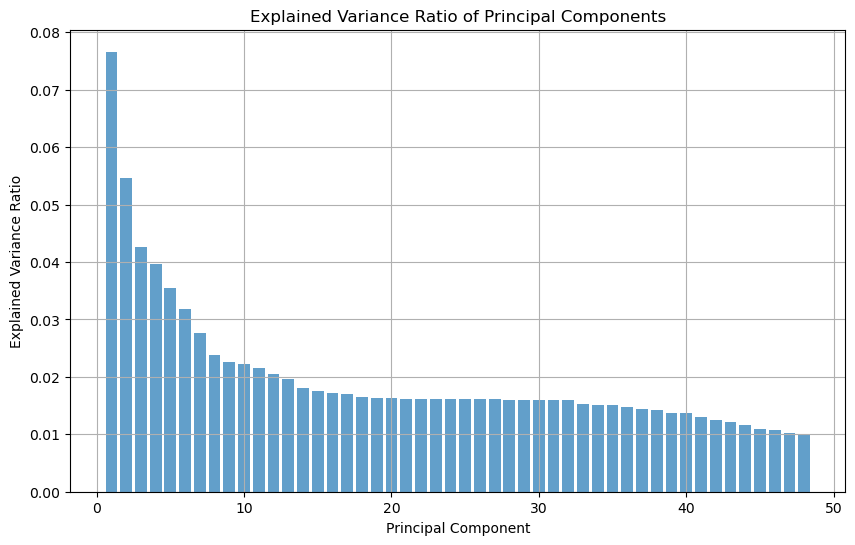

In [285]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.grid(True)

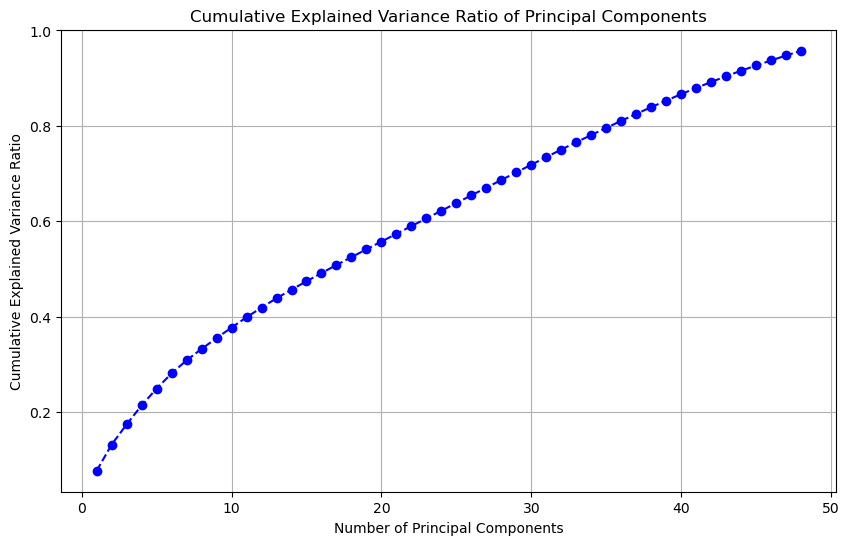

In [286]:
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio of Principal Components')
plt.grid(True)

plt.show()

# Challanges

Merging data for this project can be a complex task, and several challenges faced during the process. These challenges are include: